# Регуляризация линейной регрессии. Практическая работа

## Цель практической работы

Научиться строить модель линейной регрессии с регуляризацией на реальных данных.

## Что входит в практическую работу

1. Загрузить данные и ознакомиться с ними.
2. Изучить данные и провести анализ, сконструировать новые признаки.
3. Разделить данные на обучающую и тестовую выборки.
4. Реализовать построение модели с помощью библиотеки Scikit-learn.
5. Подобрать коэффициенты регуляризации.
6. Получить качество модели с помощью MSE, MAE, $R^2$.
7. Ответить на вопросы в конце блокнота.

## Что оценивается 

- Выполнены все этапы работы.
- Подобраны коэффициенты регуляризации.
- Сделан вывод по результатам.
- Модель не переобучена.
- Получена модель хорошего качества.
- Сделаны выводы в конце блокнота.

## Как отправить работу на проверку

Скачайте файл с заданиями в материалах, откройте его через Jupyter Notebook и выполните задания.

## Задача

С набором данных вы уже знакомы из прошлого модуля — это данные по продажам домов. В этот раз признаков будет чуть больше, чтобы вам было интереснее. Краткое описание признаков:

* **LotArea** — размер участка в квадратных футах.
* **LotArea_M** — размер участка в квадратных метрах.
* **Street** — тип доступа к дороге.
* **BldgType** — тип жилья.
* **OverallQual** — общее качество материала и отделки.
* **OverallCond** — общая оценка состояния.
* **YearBuilt** — первоначальная дата постройки.
* **YearRemodAdd** — дата реконструкции.
* **RoofStyle** — тип крыши.
* **ExterQual** — качество материалов снаружи.
* **ExterCond** — текущее состояние материалов снаружи.
* **Foundation** — тип фундамента.
* **TotalBsmtSF** — общая площадь подвала в квадратных футах.
* **TotalBsmtSF_M** — общая площадь подвала в квадратных метрах.
* **Heating** — тип отопления.
* **HeatingQC** — качество и состояние отопления.
* **CentralAir** — кондиционирование.
* **GrLivArea** — жилая площадь в квадратных футах.
* **GrLivArea_M** — жилая площадь в квадратных метрах.
* **Bath** — количество ванных комнат.
* **KitchenQual** — качество кухни.
* **GarageArea** — площадь гаража в квадратных футах.
* **GarageArea_M** — площадь гаража в квадратных метрах.
* **DateSold** — месяц и год продажи.
* **SaleCondition** — условия сделки.
* **SalePrice** — стоимость продажи в долларах. Это целевая переменная, которую нам нужно предсказать.

Постройте модель линейной регрессии на этих данных. Проверьте качество модели на обучающей и тестовой выборках с помощью MAE, MSE, $R^2$. Определите, что модель не переобучилась.

## Задание 1 

Подключите необходимые библиотеки.

In [375]:
# импорт библиотек
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt

## Задание 2

Считайте данные и посмотрите на несколько строк.

In [376]:
df = pd.read_csv('5.5 data.csv')
df

,LotArea,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,...,CentralAir,GrLivArea,GrLivArea_M,Bath,KitchenQual,GarageArea,GarageArea_M,DateSold,SaleCondition,SalePrice
0,8450,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,...,Y,1710,158.864130,3,Gd,548,50.910844,2/2008,Normal,208500
1,9600,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,...,Y,1262,117.243586,2,TA,460,42.735380,5/2007,Normal,181500
2,11250,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,...,Y,1786,165.924758,3,Gd,608,56.485024,9/2008,Normal,223500
3,9550,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,...,Y,1717,159.514451,1,Gd,642,59.643726,2/2006,Abnorml,140000
4,14260,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,...,Y,2198,204.200794,3,Gd,836,77.666908,12/2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,735.513051,Pave,1Fam,6,5,1999,2000,Gable,TA,...,Y,1647,153.011241,3,TA,460,42.735380,8/2007,Normal,175000
1456,13175,1223.997025,Pave,1Fam,6,6,1978,1988,Gable,TA,...,Y,2073,192.587919,2,TA,500,46.451500,2/2010,Normal,210000
1457,9042,840.028926,Pave,1Fam,7,9,1941,2006,Gable,Ex,...,Y,2340,217.393020,2,Gd,252,23.411556,5/2010,Normal,266500
1458,9717,902.738451,Pave,1Fam,5,6,1950,1996,Hip,TA,...,Y,1078,100.149434,1,Gd,240,22.296720,4/2010,Normal,142125


## Задание 3 

Проведите разведочный анализ:



### 1. Выведите описательные статистики для числовых признаков.

In [377]:
### Ваш код здесь ###
df.info() # выводим информацию о датафпейме

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 26 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   LotArea        1460 non-null   int64  
 1   LotArea_M      1460 non-null   float64
 2   Street         1460 non-null   object 
 3   BldgType       1460 non-null   object 
 4   OverallQual    1460 non-null   int64  
 5   OverallCond    1460 non-null   int64  
 6   YearBuilt      1460 non-null   int64  
 7   YearRemodAdd   1460 non-null   int64  
 8   RoofStyle      1460 non-null   object 
 9   ExterQual      1460 non-null   object 
 10  ExterCond      1460 non-null   object 
 11  Foundation     1460 non-null   object 
 12  TotalBsmtSF    1460 non-null   int64  
 13  TotalBsmtSF_M  1460 non-null   float64
 14  Heating        1460 non-null   object 
 15  HeatingQC      1460 non-null   object 
 16  CentralAir     1460 non-null   object 
 17  GrLivArea      1460 non-null   int64  
 18  GrLivAre

In [378]:
import pandas as pd

# создадим список названий числовых признаков
numerical_features = ['LotArea', 'LotArea_M', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
                      'TotalBsmtSF', 'TotalBsmtSF_M', 'GrLivArea', 'GrLivArea_M', 'Bath', 'GarageArea', 'GarageArea_M', 'SalePrice']

numerical_stats = df[numerical_features].describe()
print(numerical_stats)


             LotArea     LotArea_M  OverallQual  OverallCond    YearBuilt  \
count    1460.000000   1460.000000  1460.000000  1460.000000  1460.000000   
mean    10516.828082    977.044879     6.099315     5.575342  1971.267808   
std      9981.264932    927.289456     1.382997     1.112799    30.202904   
min      1300.000000    120.773900     1.000000     1.000000  1872.000000   
25%      7553.500000    701.742811     5.000000     5.000000  1954.000000   
50%      9478.500000    880.581085     6.000000     5.000000  1973.000000   
75%     11601.500000   1077.814155     7.000000     6.000000  2000.000000   
max    215245.000000  19996.906235    10.000000     9.000000  2010.000000   

       YearRemodAdd  TotalBsmtSF  TotalBsmtSF_M    GrLivArea  GrLivArea_M  \
count   1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean    1984.865753  1057.429452      98.238368  1515.463699   140.791124   
std       20.645407   438.705324      40.757041   525.480383    48.818704  

### 2. Постройте матрицу корреляций числовых признаков. Удалите линейно-зависимые признаки из данных.

               LotArea  LotArea_M  OverallQual  OverallCond  YearBuilt  \
LotArea           1.00       1.00         0.11        -0.01       0.01   
LotArea_M         1.00       1.00         0.11        -0.01       0.01   
OverallQual       0.11       0.11         1.00        -0.09       0.57   
OverallCond      -0.01      -0.01        -0.09         1.00      -0.38   
YearBuilt         0.01       0.01         0.57        -0.38       1.00   
YearRemodAdd      0.01       0.01         0.55         0.07       0.59   
TotalBsmtSF       0.26       0.26         0.54        -0.17       0.39   
TotalBsmtSF_M     0.26       0.26         0.54        -0.17       0.39   
GrLivArea         0.26       0.26         0.59        -0.08       0.20   
GrLivArea_M       0.26       0.26         0.59        -0.08       0.20   
Bath              0.10       0.10         0.55        -0.17       0.48   
GarageArea        0.18       0.18         0.56        -0.15       0.48   
GarageArea_M      0.18       0.18     

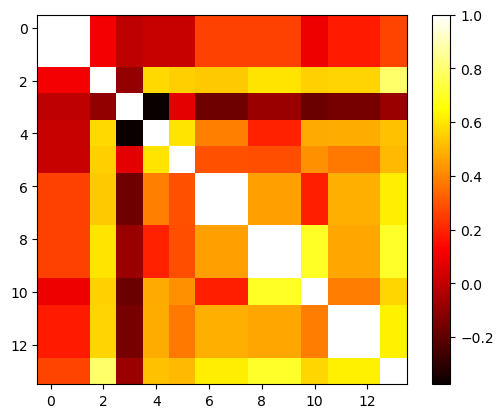


 Матрица корелляций с признаками, где корреляция больше 0,5


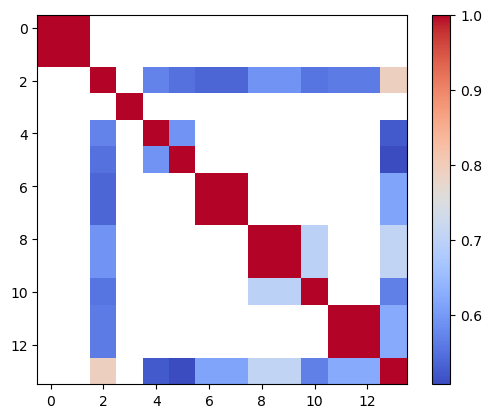

In [379]:
# Построение матрицы корреляций
correlation_matrix = df[numerical_features].corr()

# Вывод матрицы корреляций
print(correlation_matrix.round(2))
# Создание тепловой карты
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
print('\n Матрица корелляций')
# Отображение тепловой карты
plt.show()

# Отфильтруйте матрицу корреляции, чтобы оставить только значения больше 0,5
filtered_matrix = correlation_matrix[correlation_matrix > 0.5]

# Получите список признаков с корреляцией больше 0,4
selected_features = filtered_matrix.columns[filtered_matrix.any()]

print('\n Матрица корелляций с признаками, где корреляция больше 0,5')
# Создание тепловой карты
plt.imshow(filtered_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

In [380]:
# Установка порога для определения линейно-зависимых признаков
threshold = 0.9

# Поиск линейно-зависимых признаков
linearly_dependent_features = set()
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            feature_i = correlation_matrix.columns[i]
            feature_j = correlation_matrix.columns[j]
            linearly_dependent_features.add(feature_i)
            linearly_dependent_features.add(feature_j)

# Вывод линейно-зависимых признаков
print("Линейно-зависимые признаки:")
print(linearly_dependent_features)


Линейно-зависимые признаки:
{'GarageArea_M', 'GrLivArea', 'TotalBsmtSF_M', 'GrLivArea_M', 'GarageArea', 'TotalBsmtSF', 'LotArea', 'LotArea_M'}


               GarageArea_M  GrLivArea  TotalBsmtSF_M  GrLivArea_M  \
GarageArea_M           1.00       0.47           0.49         0.47   
GrLivArea              0.47       1.00           0.45         1.00   
TotalBsmtSF_M          0.49       0.45           1.00         0.45   
GrLivArea_M            0.47       1.00           0.45         1.00   
GarageArea             1.00       0.47           0.49         0.47   
TotalBsmtSF            0.49       0.45           1.00         0.45   
LotArea                0.18       0.26           0.26         0.26   
LotArea_M              0.18       0.26           0.26         0.26   

               GarageArea  TotalBsmtSF  LotArea  LotArea_M  
GarageArea_M         1.00         0.49     0.18       0.18  
GrLivArea            0.47         0.45     0.26       0.26  
TotalBsmtSF_M        0.49         1.00     0.26       0.26  
GrLivArea_M          0.47         0.45     0.26       0.26  
GarageArea           1.00         0.49     0.18       0.18  
Tot

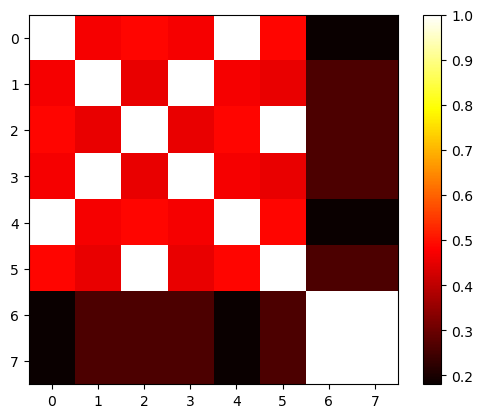

In [381]:

# Построение матрицы корреляций
correlation_matrix = df[linearly_dependent_features].corr()

# Вывод матрицы корреляций
print(correlation_matrix.round(2))
# Создание тепловой карты
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
print('\n Матрица корелляций линейно-зависимых признаков')
# Отображение тепловой карты
plt.show()

In [382]:
# Список линейно-зависимых признаков (удалим площадь в футах, оставим привычное в м. кв.)
linear_dependent_features = ['TotalBsmtSF', 'GarageArea', 'LotArea', 'GrLivArea'] #['TotalBsmtSF_M', 'GarageArea_M', 'LotArea_M', 'GrLivArea_M']

# Удалите линейно-зависимые признаки из датафрейма
df = df.drop(linear_dependent_features, axis=1)

In [383]:
df

,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,Heating,HeatingQC,CentralAir,GrLivArea_M,Bath,KitchenQual,GarageArea_M,DateSold,SaleCondition,SalePrice
0,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,GasA,Ex,Y,158.864130,3,Gd,50.910844,2/2008,Normal,208500
1,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,GasA,Ex,Y,117.243586,2,TA,42.735380,5/2007,Normal,181500
2,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,GasA,Ex,Y,165.924758,3,Gd,56.485024,9/2008,Normal,223500
3,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,GasA,Gd,Y,159.514451,1,Gd,59.643726,2/2006,Abnorml,140000
4,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,GasA,Ex,Y,204.200794,3,Gd,77.666908,12/2008,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,735.513051,Pave,1Fam,6,5,1999,2000,Gable,TA,TA,...,GasA,Ex,Y,153.011241,3,TA,42.735380,8/2007,Normal,175000
1456,1223.997025,Pave,1Fam,6,6,1978,1988,Gable,TA,TA,...,GasA,TA,Y,192.587919,2,TA,46.451500,2/2010,Normal,210000
1457,840.028926,Pave,1Fam,7,9,1941,2006,Gable,Ex,Gd,...,GasA,Ex,Y,217.393020,2,Gd,23.411556,5/2010,Normal,266500
1458,902.738451,Pave,1Fam,5,6,1950,1996,Hip,TA,TA,...,GasA,Gd,Y,100.149434,1,Gd,22.296720,4/2010,Normal,142125


               LotArea_M  OverallQual  OverallCond  YearBuilt  YearRemodAdd  \
LotArea_M           1.00         0.11        -0.01       0.01          0.01   
OverallQual         0.11         1.00        -0.09       0.57          0.55   
OverallCond        -0.01        -0.09         1.00      -0.38          0.07   
YearBuilt           0.01         0.57        -0.38       1.00          0.59   
YearRemodAdd        0.01         0.55         0.07       0.59          1.00   
TotalBsmtSF_M       0.26         0.54        -0.17       0.39          0.29   
GrLivArea_M         0.26         0.59        -0.08       0.20          0.29   
Bath                0.10         0.55        -0.17       0.48          0.42   
GarageArea_M        0.18         0.56        -0.15       0.48          0.37   
SalePrice           0.26         0.79        -0.08       0.52          0.51   

               TotalBsmtSF_M  GrLivArea_M  Bath  GarageArea_M  SalePrice  
LotArea_M               0.26         0.26  0.10        

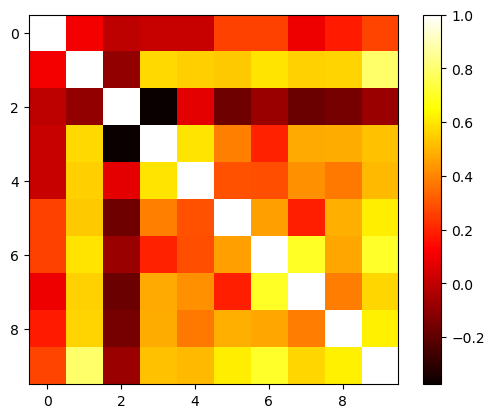

In [384]:
# Построение матрицы корреляций
correlation_matrix = df.corr()
# Вывод матрицы корреляций
print(correlation_matrix.round(2))
# Создание тепловой карты
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()
print('\n Матрица корелляций линейно-зависимых признаков')
# Отображение тепловой карты
plt.show()

In [385]:
linear_dependent_features

['TotalBsmtSF', 'GarageArea', 'LotArea', 'GrLivArea']

In [386]:
# удаление линейно-зависимых признаков из numerical_features
import numpy as np
numerical_features = np.setdiff1d(numerical_features, linear_dependent_features)
numerical_features

array(['Bath', 'GarageArea_M', 'GrLivArea_M', 'LotArea_M', 'OverallCond',
       'OverallQual', 'SalePrice', 'TotalBsmtSF_M', 'YearBuilt',
       'YearRemodAdd'], dtype='<U13')

               Bath  GarageArea_M  GrLivArea_M  LotArea_M  OverallCond  \
Bath           1.00          0.38         0.70       0.10        -0.17   
GarageArea_M   0.38          1.00         0.47       0.18        -0.15   
GrLivArea_M    0.70          0.47         1.00       0.26        -0.08   
LotArea_M      0.10          0.18         0.26       1.00        -0.01   
OverallCond   -0.17         -0.15        -0.08      -0.01         1.00   
OverallQual    0.55          0.56         0.59       0.11        -0.09   
SalePrice      0.57          0.62         0.71       0.26        -0.08   
TotalBsmtSF_M  0.19          0.49         0.45       0.26        -0.17   
YearBuilt      0.48          0.48         0.20       0.01        -0.38   
YearRemodAdd   0.42          0.37         0.29       0.01         0.07   

               OverallQual  SalePrice  TotalBsmtSF_M  YearBuilt  YearRemodAdd  
Bath                  0.55       0.57           0.19       0.48          0.42  
GarageArea_M          0.5

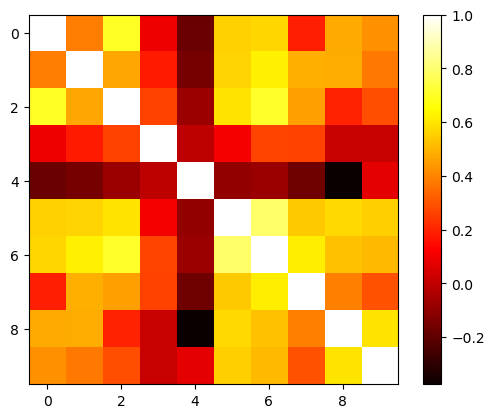

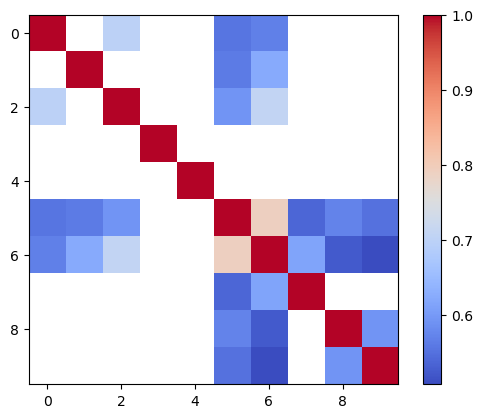

In [387]:
# Построение матрицы корреляций
correlation_matrix = df[numerical_features].corr()

# Вывод матрицы корреляций
print(correlation_matrix.round(2))
# Создание тепловой карты
plt.imshow(correlation_matrix, cmap='hot', interpolation='nearest')
plt.colorbar()

# Отображение тепловой карты
plt.show()

# Отфильтруйте матрицу корреляции, чтобы оставить только значения больше 0,5
filtered_matrix = correlation_matrix[correlation_matrix > 0.5]

# Получите список признаков с корреляцией больше 0,4
selected_features = filtered_matrix.columns[filtered_matrix.any()]

# Создание тепловой карты
plt.imshow(filtered_matrix, cmap='coolwarm', interpolation='nearest')
plt.colorbar()

### 3. Посмотрите на индивидуальные графики зависимости целевой функции и отдельной переменной.

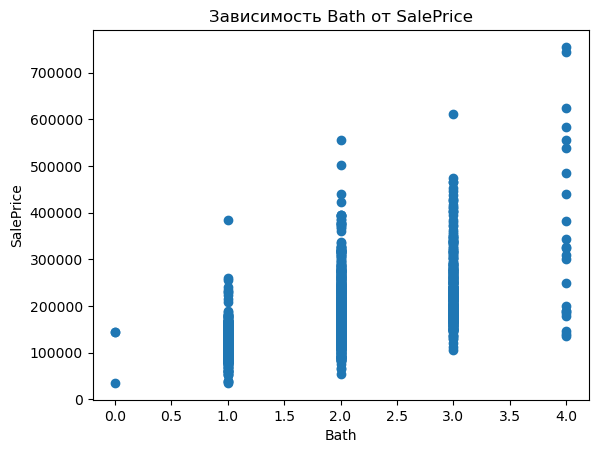

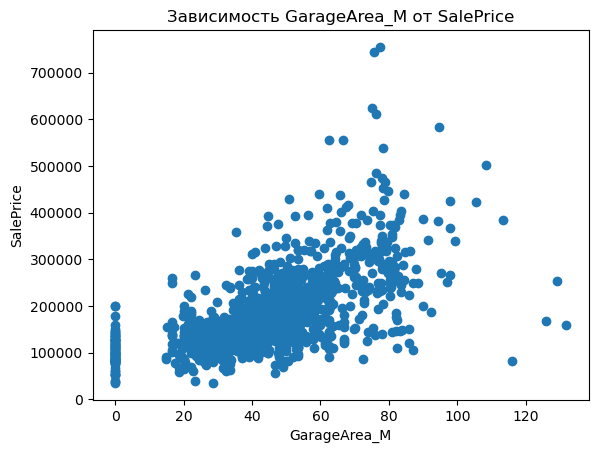

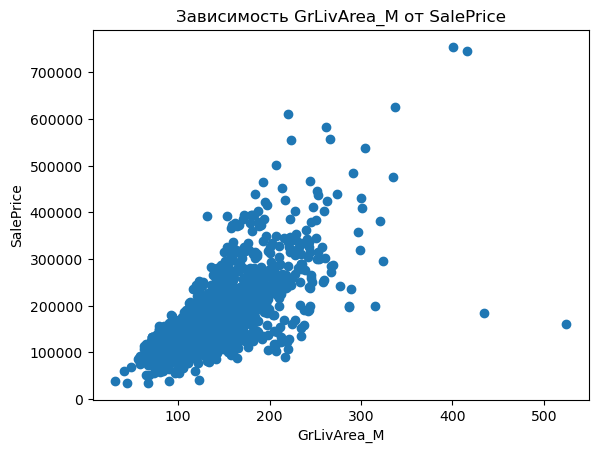

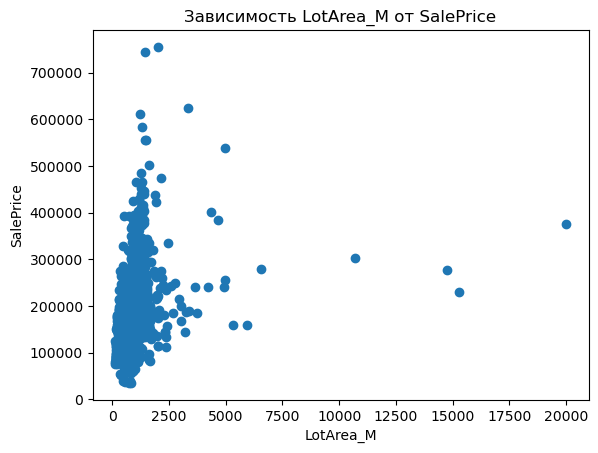

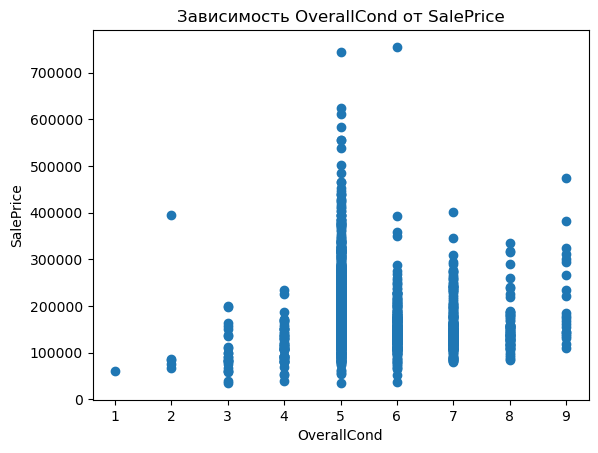

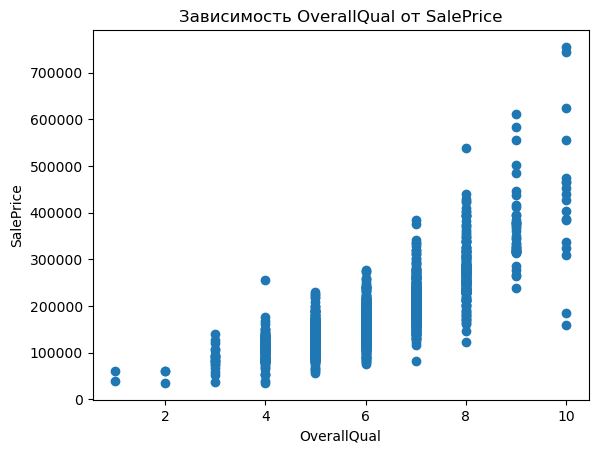

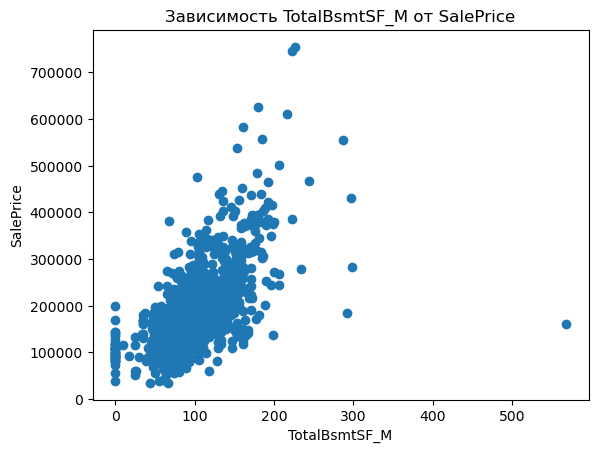

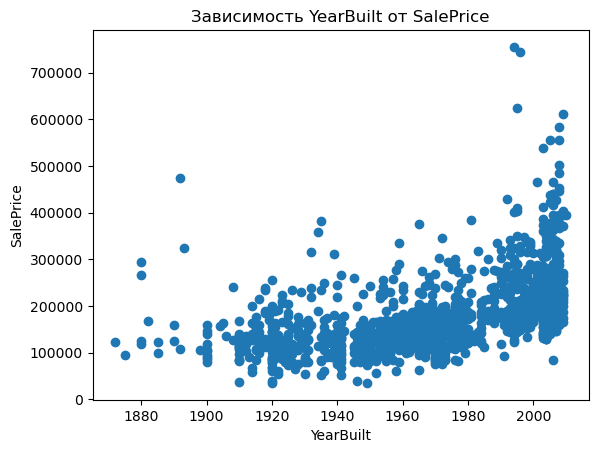

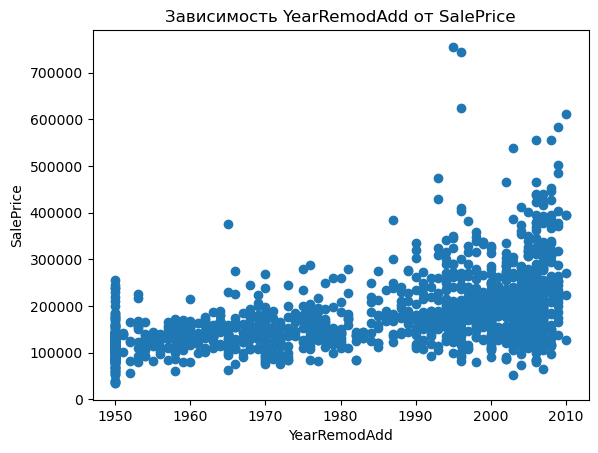

In [388]:
import matplotlib.pyplot as plt
import pandas as pd


# Построение графиков
for variable in df[numerical_features]:
    if variable != 'SalePrice':
        plt.scatter(df[variable], df['SalePrice'])
        plt.xlabel(variable)
        plt.ylabel('SalePrice')
        plt.title(f'Зависимость {variable} от SalePrice')
        plt.show()


In [389]:
numerical_stats = df[numerical_features].describe()
print(numerical_stats)

              Bath  GarageArea_M  GrLivArea_M     LotArea_M  OverallCond  \
count  1460.000000   1460.000000  1460.000000   1460.000000  1460.000000   
mean      1.947945     43.941274   140.791124    977.044879     5.575342   
std       0.794965     19.863111    48.818704    927.289456     1.112799   
min       0.000000      0.000000    31.029602    120.773900     1.000000   
25%       1.000000     31.076054   104.933938    701.742811     5.000000   
50%       2.000000     44.593440   136.009992    880.581085     5.000000   
75%       3.000000     53.512128   165.065405   1077.814155     6.000000   
max       4.000000    131.736454   524.158726  19996.906235     9.000000   

       OverallQual      SalePrice  TotalBsmtSF_M    YearBuilt  YearRemodAdd  
count  1460.000000    1460.000000    1460.000000  1460.000000   1460.000000  
mean      6.099315  180921.195890      98.238368  1971.267808   1984.865753  
std       1.382997   79442.502883      40.757041    30.202904     20.645407  
min

#### Решая предыдущий вопрос, сделал инструмент, который выводит индивидуальные графики зависимости признака (на выбор) с другими признаками.


Инструмент, который выводит зависимости признака (на выбор) с другими признаками 

Имеем следущие числовые признаки:
 ['Bath' 'GarageArea_M' 'GrLivArea_M' 'LotArea_M' 'OverallCond'
 'OverallQual' 'SalePrice' 'TotalBsmtSF_M' 'YearBuilt' 'YearRemodAdd']


Скопируйте и введите признак для проверки (без кавычек!) GrLivArea_M


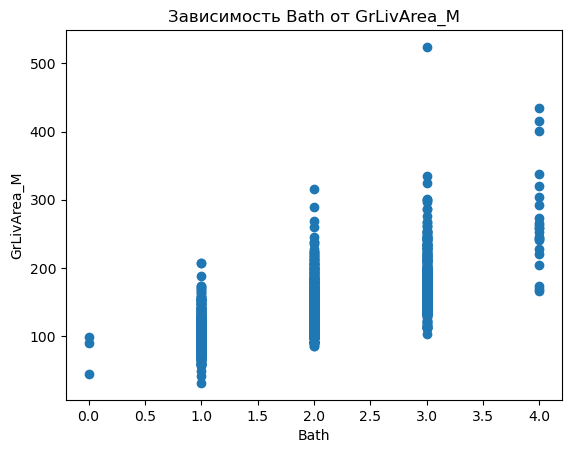

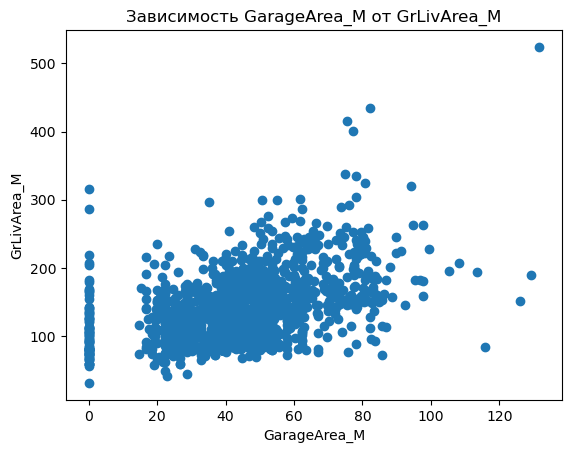

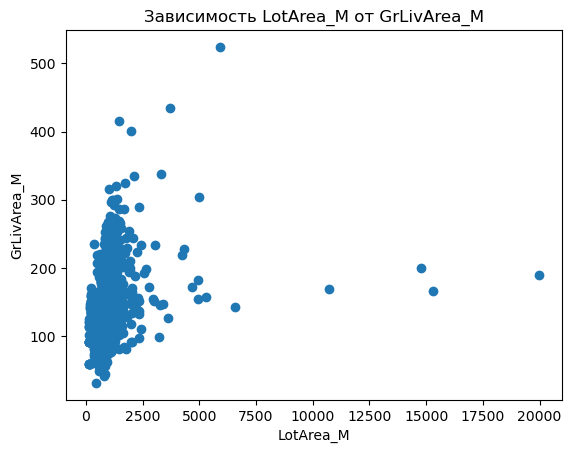

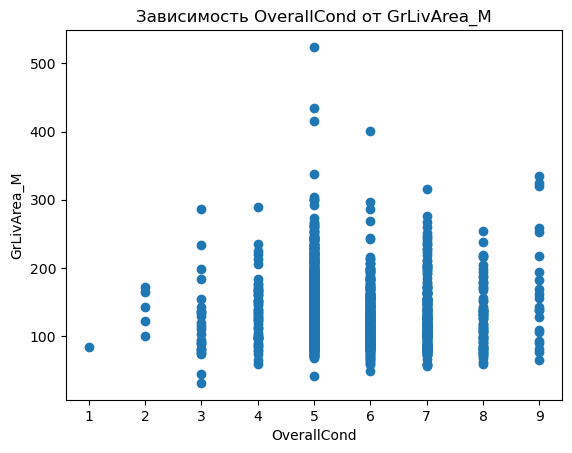

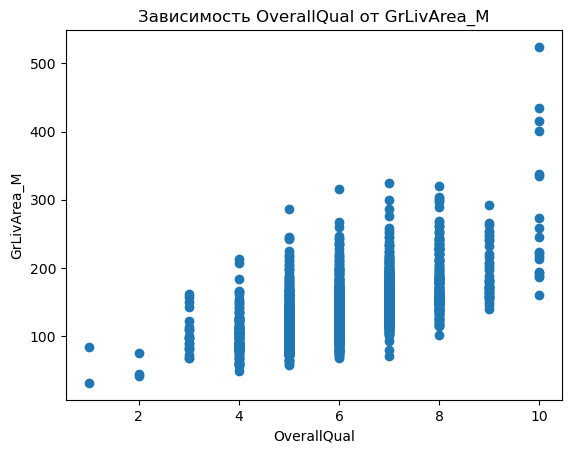

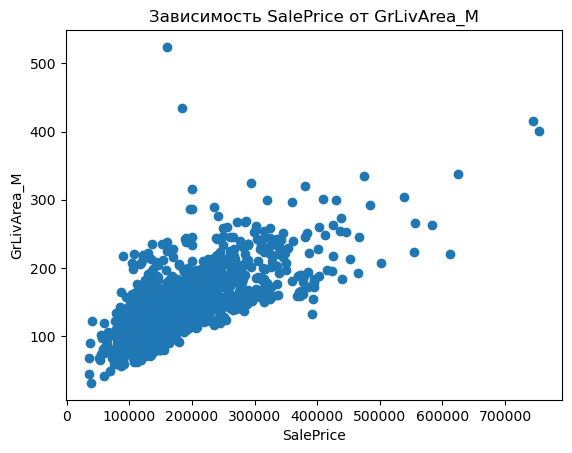

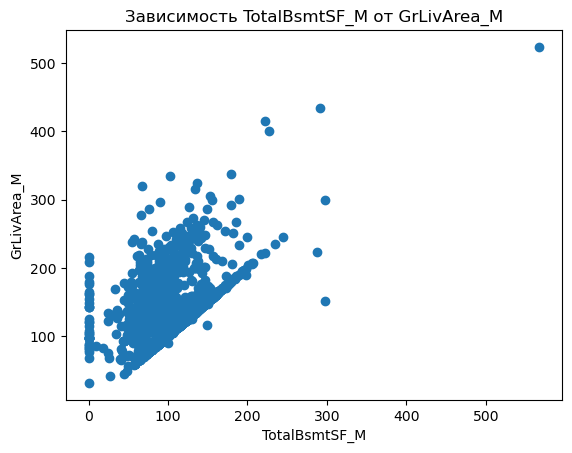

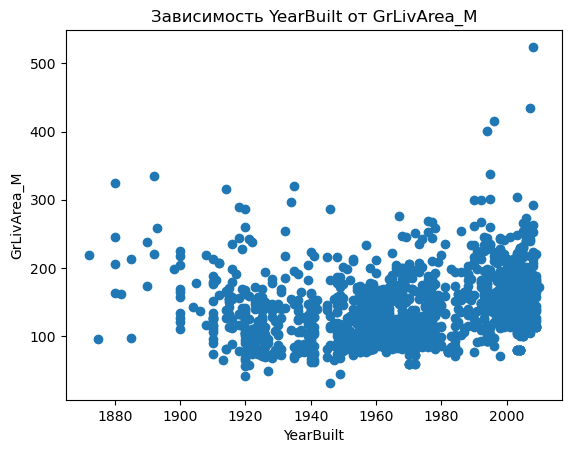

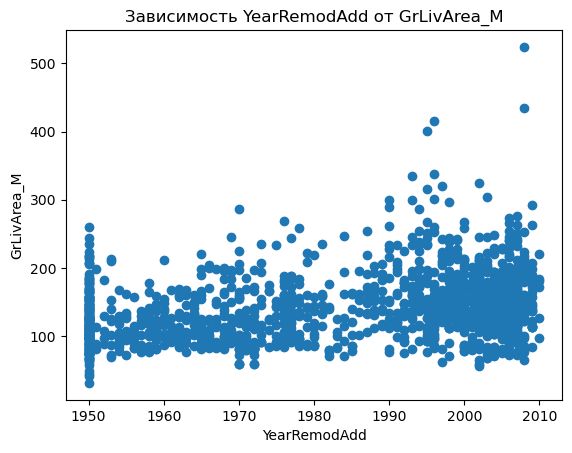

In [390]:
print('\nИнструмент, который выводит зависимости признака (на выбор) с другими признаками \n')
print('Имеем следущие числовые признаки:\n', numerical_features)
feature_for_control = input('Скопируйте и введите признак для проверки (без кавычек!)')
# Построение графиков
for variable in df[numerical_features]:
    if variable != feature_for_control:
        plt.scatter(df[variable], df[feature_for_control])
        plt.xlabel(variable)
        plt.ylabel(feature_for_control)
        plt.title(f'Зависимость {variable} от {feature_for_control}')
        plt.show()


Найдем выбросы для каждого признака используя СТАНДАРТНОЕ ОТКЛОНЕНИЕ
-0.436133623626046 4.3320240345849506
Bath Выбросы: []
Процент выбросов: 0.0


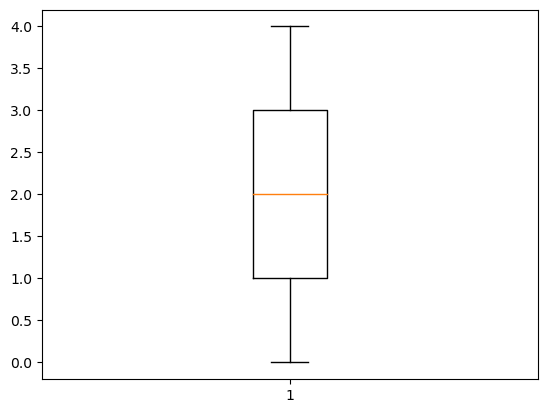

-15.627649088580256 103.51019642145702
GarageArea_M Выбросы: [108.324898, 129.13517, 105.352002, 113.34166, 115.942944, 125.976468, 131.736454]
Процент выбросов: 0.48


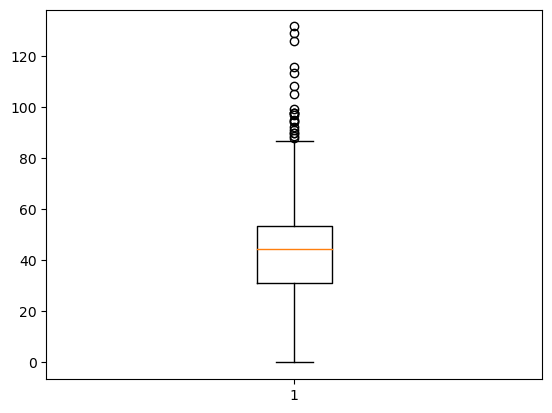

-5.6148233955260025 287.19707138319677
GrLivArea_M Выбросы: [299.333466, 335.194024, 289.114136, 324.510179, 299.890884, 434.414428, 296.732182, 315.405685, 400.969348, 304.628937, 291.71542, 336.959181, 415.833828, 320.236641, 524.158726, 300.819914]
Процент выбросов: 1.1


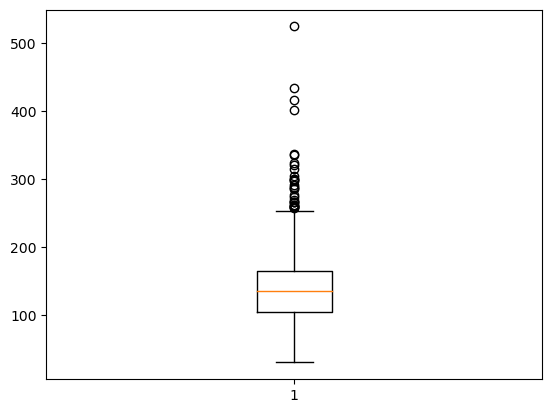

-1803.870630883469 3757.9603895231994
LotArea_M Выбросы: [4670.326713, 14771.577, 19996.906235, 15297.40798, 4933.799621, 6573.909183, 4944.947981, 4328.257867, 10697.687547, 4970.682112, 4236.3768, 5935.293961, 5314.0516]
Процент выбросов: 0.89


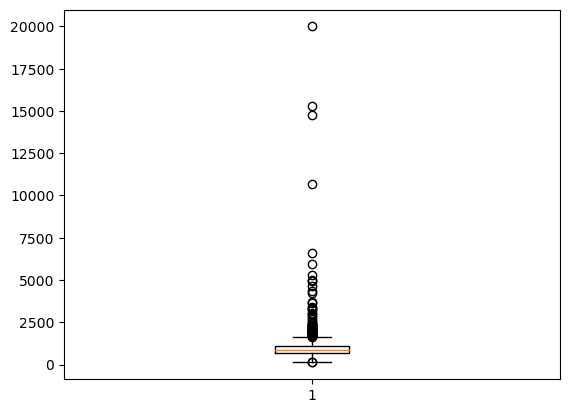

2.2380879384403807 8.912596993066469
OverallCond Выбросы: [2, 9, 9, 9, 9, 2, 9, 1, 2, 2, 9, 9, 9, 9, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
Процент выбросов: 1.92


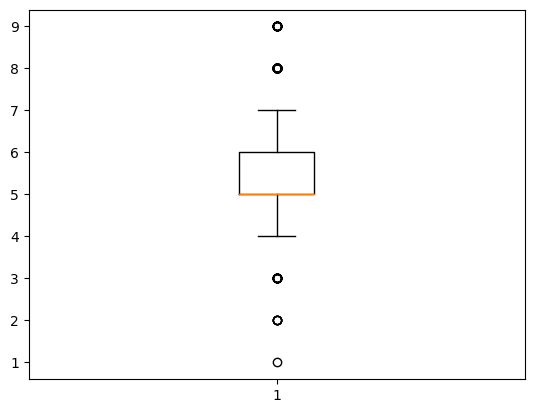

1.9517465585173674 10.246883578468934
OverallQual Выбросы: [1, 1]
Процент выбросов: 0.14


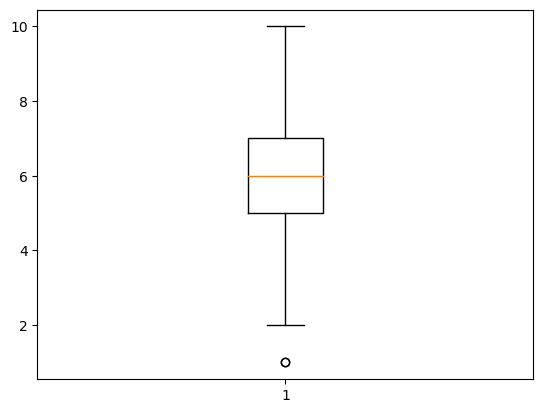

-57324.67976779159 419167.0715486135
SalePrice Выбросы: [438780, 501837, 475000, 437154, 426000, 555000, 440000, 430000, 446261, 451950, 423000, 755000, 538000, 485000, 582933, 611657, 556581, 424870, 625000, 745000, 465000, 466500]
Процент выбросов: 1.51


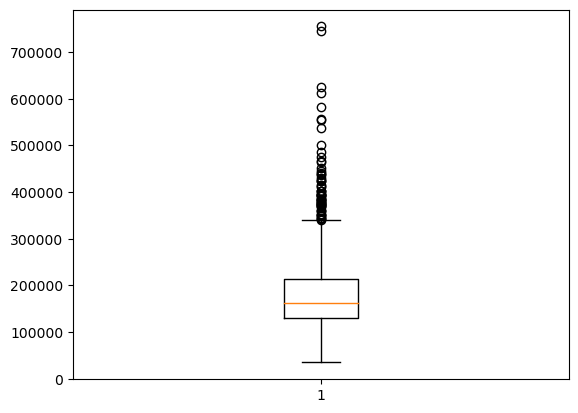

-23.990873045910135 220.4676098144036
TotalBsmtSF_M Выбросы: [222.223976, 297.847018, 287.441882, 297.2896, 291.529614, 227.054932, 234.487172, 222.595588, 567.63733, 244.613599]
Процент выбросов: 0.68


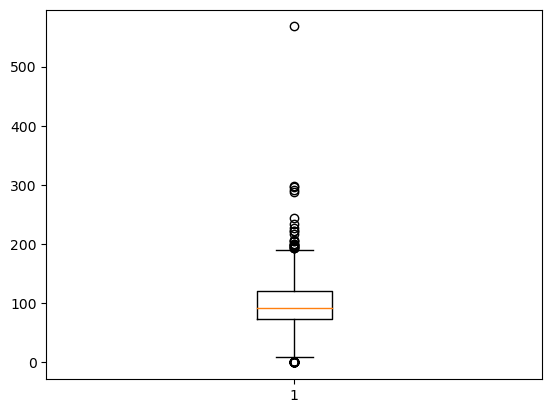

1880.6901317877098 2061.8454846506465
YearBuilt Выбросы: [1880, 1880, 1880, 1880, 1875, 1872]
Процент выбросов: 0.41


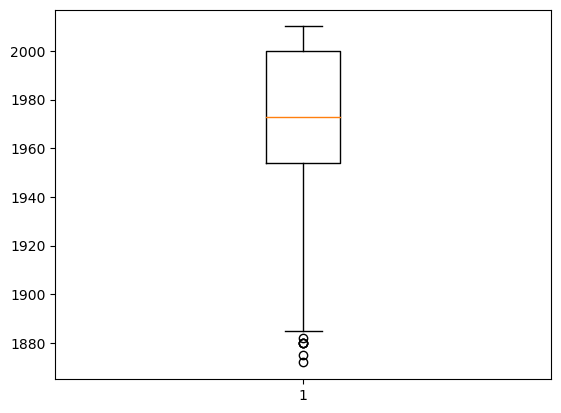

1922.9507476691915 2046.7807591801234
YearRemodAdd Выбросы: []
Процент выбросов: 0.0


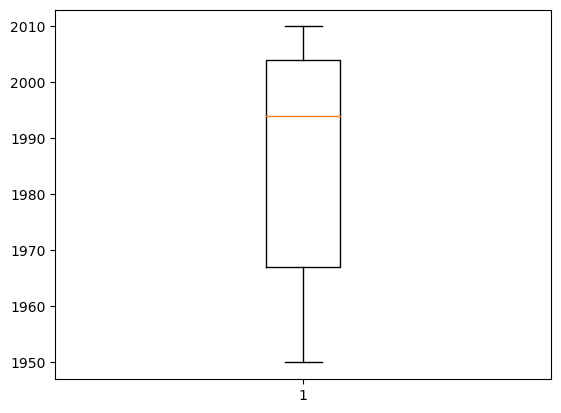

In [391]:
print('Найдем выбросы для каждого признака используя СТАНДАРТНОЕ ОТКЛОНЕНИЕ')
my_dict_outliers = {} # словарь с найденными выбросами по каждому признаку
bounds = {} # границы выбросов по каждому признаку
import numpy as np
def find_outliers(out):
    # Вычисляем статистические метрики для каждого признака
    mean = np.mean(out)
    std = np.std(out)
    
    # Определяем границы выбросов
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    print(lower_bound, upper_bound)
    bounds[variable] = [lower_bound, upper_bound]
    # Ищем выбросы
    outliers = []
    for feature in out:
        if feature < lower_bound or feature > upper_bound:
            outliers.append(feature)
    
    return outliers

for variable in df[numerical_features]:
    out = (df[variable])
    outliers = find_outliers(out)
    my_dict_outliers[variable] = outliers
    print(variable, "Выбросы:", outliers)
    print('Процент выбросов:', round(len(outliers)/len(df[variable])*100, 2))
    plt.boxplot(df[variable])

# # Отображение график
    plt.show()
    my_dict_outliers

#### Стандартное отклонение (повтор для себя) 

In [18]:
# вычисление стандартного отклонения используя инструмент библиотеки
data = [1, 2, 3, 4, 5]
std_deviation = np.std(data)
print("Стандартное отклонение:", std_deviation)


Стандартное отклонение: 1.4142135623730951


In [19]:
# вычисление стандартного отклонения самостоятельно
def calculate_standard_deviation(data):
    n = len(data)
    mean = sum(data) / n
    squared_diff_sum = sum((x - mean) ** 2 for x in data)
    variance = squared_diff_sum / n
    standard_deviation = variance ** 0.5
    return standard_deviation

# Пример использования
data = [1, 2, 3, 4, 5]
std_dev = calculate_standard_deviation(data)
print("Стандартное отклонение:", std_dev)


Стандартное отклонение: 1.4142135623730951


In [20]:
print('Найдем выбросы для каждого признака используя ИНТЕРКВАРТИЛЬНЫЙ РАЗМАХ')

def find_outliers_2(data):
    # Вычисляем первый и третий квартили
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    
    # Вычисляем межквартильный размах
    iqr = q3 - q1
    
    # Определяем границы выбросов
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    print(lower_bound, upper_bound)
    # Находим выбросы
    outliers = [x for x in data if x < lower_bound or x > upper_bound]
    
    return outliers

# Пример использования
# data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 100]
# outliers = find_outliers(data)
# print(outliers)
for variable in df[numerical_features]:
    data = (df[variable])
    outliers = find_outliers_2(data)
    print(variable, "Выбросы:", outliers)

Найдем выбросы для каждого признака используя ИНТЕРКВАРТИЛЬНЫЙ РАЗМАХ
-2.0 6.0
Bath Выбросы: []
-27.75 938.25
GarageArea Выбросы: [1166, 968, 1053, 1025, 947, 1390, 1134, 983, 1020, 1220, 1248, 1043, 1052, 995, 1356, 1052, 954, 1014, 1418, 968, 1069]
158.625 2747.625
GrLivArea Выбросы: [2945, 3222, 3608, 3112, 2794, 3493, 2978, 3228, 4676, 2775, 3194, 3395, 4316, 3279, 3140, 2822, 2872, 2898, 3082, 2868, 2828, 3627, 3086, 2872, 4476, 3447, 5642, 2810, 2792, 3238, 2784]
1481.5 17673.5
LotArea Выбросы: [50271, 19900, 21000, 21453, 19378, 31770, 22950, 25419, 159000, 19296, 39104, 19138, 18386, 215245, 164660, 20431, 18800, 53107, 34650, 22420, 21750, 70761, 53227, 40094, 32668, 21872, 21780, 25095, 46589, 20896, 18450, 21535, 26178, 115149, 21695, 53504, 21384, 28698, 45600, 17920, 25286, 27650, 24090, 25000, 1300, 21286, 1477, 21750, 29959, 18000, 23257, 17755, 35760, 18030, 35133, 32463, 18890, 24682, 23595, 17871, 36500, 63887, 20781, 25339, 57200, 20544, 19690, 21930, 26142]
3.5 7.5


### Удалим выбросы, найденные с помощью стандартного отклонения 

In [392]:
bounds

{'Bath': [-0.436133623626046, 4.3320240345849506],
 'GarageArea_M': [-15.627649088580256, 103.51019642145702],
 'GrLivArea_M': [-5.6148233955260025, 287.19707138319677],
 'LotArea_M': [-1803.870630883469, 3757.9603895231994],
 'OverallCond': [2.2380879384403807, 8.912596993066469],
 'OverallQual': [1.9517465585173674, 10.246883578468934],
 'SalePrice': [-57324.67976779159, 419167.0715486135],
 'TotalBsmtSF_M': [-23.990873045910135, 220.4676098144036],
 'YearBuilt': [1880.6901317877098, 2061.8454846506465],
 'YearRemodAdd': [1922.9507476691915, 2046.7807591801234]}

In [393]:
# Есть ли связь с выбросами с другими признаками
# Фильтрация датафрейма по столбцу "LotArea"

filtered_df = df[numerical_features][df['LotArea_M'].isin(my_dict_outliers['LotArea_M'])]

# Вывод отфильтрованных строк
filtered_df


,Bath,GarageArea_M,GrLivArea_M,LotArea_M,OverallCond,OverallQual,SalePrice,TotalBsmtSF_M,YearBuilt,YearRemodAdd
53,1,83.055282,171.127326,4670.326713,5,9,385000,171.127326,1981,1987
249,2,36.139267,199.184032,14771.577000,7,6,277000,134.151932,1958,2006
313,2,47.659239,189.150508,19996.906235,5,7,375000,198.440808,1965,1965
335,2,49.145687,165.924758,15297.407980,6,5,228950,139.261597,1965,1965
384,3,46.544403,181.439559,4933.799621,5,6,240000,146.786740,1992,1992
451,2,53.512128,142.420299,6573.909183,5,7,280000,142.420299,1975,1975
457,1,49.145687,154.497689,4944.947981,6,4,256000,126.719692,1954,1994
661,3,66.054033,227.426544,4328.257867,7,8,402000,151.338987,1994,2005
706,2,68.655317,169.455072,10697.687547,5,7,302000,152.639629,1971,2002
769,4,78.131423,304.628937,4970.682112,5,8,538000,153.289950,2003,2003


In [394]:
#df.loc[df["LotArea"].isin(my_dict_outliers['LotArea']), "LotArea"] = 40450

In [395]:


for key, value in my_dict_outliers.items():
    print(key, value)


Bath []
GarageArea_M [108.324898, 129.13517, 105.352002, 113.34166, 115.942944, 125.976468, 131.736454]
GrLivArea_M [299.333466, 335.194024, 289.114136, 324.510179, 299.890884, 434.414428, 296.732182, 315.405685, 400.969348, 304.628937, 291.71542, 336.959181, 415.833828, 320.236641, 524.158726, 300.819914]
LotArea_M [4670.326713, 14771.577, 19996.906235, 15297.40798, 4933.799621, 6573.909183, 4944.947981, 4328.257867, 10697.687547, 4970.682112, 4236.3768, 5935.293961, 5314.0516]
OverallCond [2, 9, 9, 9, 9, 2, 9, 1, 2, 2, 9, 9, 9, 9, 2, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9]
OverallQual [1, 1]
SalePrice [438780, 501837, 475000, 437154, 426000, 555000, 440000, 430000, 446261, 451950, 423000, 755000, 538000, 485000, 582933, 611657, 556581, 424870, 625000, 745000, 465000, 466500]
TotalBsmtSF_M [222.223976, 297.847018, 287.441882, 297.2896, 291.529614, 227.054932, 234.487172, 222.595588, 567.63733, 244.613599]
YearBuilt [1880, 1880, 1880, 1880, 1875, 1872]
YearRemodAdd []


### 4. Сделайте предварительные выводы.

При исследовании числовых признаков были выявлены и удалены мультиколлинеарные признаки. Анализ числовых признаков показывает их влияние на цену.  Есть небольшие выбросы, но пока их удалять не буду, может они связаны и с другими признаками. Годы рассматриваются как числовой признак, надо перевести в категориальный. Также есть множество категориальных признаков, которые еще не участвуют в исследовании.

Дальнейший план
1. Обучим модель на числовых признаках как есть
2. Годы переведем в категориальные и повторим шаг 1
3. Будем добавлять поочередно другие признаки и анализировать метрики

In [396]:
df_new = df[numerical_features]

In [397]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df_new.drop('SalePrice', axis=1)
y = df_new['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [398]:
model = LinearRegression()

In [399]:
model.fit(X_train, y_train)

LinearRegression()

In [400]:
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

In [401]:
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 1435496800.4084396
Test MSE: 1324633018.7312288


In [402]:
df_new

,Bath,GarageArea_M,GrLivArea_M,LotArea_M,OverallCond,OverallQual,SalePrice,TotalBsmtSF_M,YearBuilt,YearRemodAdd
0,3,50.910844,158.864130,785.030350,5,7,208500,79.524968,2003,2003
1,2,42.735380,117.243586,891.868800,8,6,181500,117.243586,1976,1976
2,3,56.485024,165.924758,1045.158750,5,7,223500,85.470760,2001,2002
3,1,59.643726,159.514451,887.223650,5,7,140000,70.234668,1915,1970
4,3,77.666908,204.200794,1324.796780,5,8,250000,106.373935,2000,2000
...,...,...,...,...,...,...,...,...,...,...
1455,3,42.735380,153.011241,735.513051,5,6,175000,88.536559,1999,2000
1456,2,46.451500,192.587919,1223.997025,6,6,210000,143.256426,1978,1988
1457,2,23.411556,217.393020,840.028926,9,7,266500,107.024256,1941,2006
1458,1,22.296720,100.149434,902.738451,6,5,142125,100.149434,1950,1996


Годы рассматриваются как числовой признак. Может есть смысл перевести их в категориальный? Проверим.

In [403]:
# ВЫВЕДЕМ УНИКАЛЬНЫЕ 
df_new.YearBuilt.unique()

array([2003, 1976, 2001, 1915, 2000, 1993, 2004, 1973, 1931, 1939, 1965,
       2005, 1962, 2006, 1960, 1929, 1970, 1967, 1958, 1930, 2002, 1968,
       2007, 1951, 1957, 1927, 1920, 1966, 1959, 1994, 1954, 1953, 1955,
       1983, 1975, 1997, 1934, 1963, 1981, 1964, 1999, 1972, 1921, 1945,
       1982, 1998, 1956, 1948, 1910, 1995, 1991, 2009, 1950, 1961, 1977,
       1985, 1979, 1885, 1919, 1990, 1969, 1935, 1988, 1971, 1952, 1936,
       1923, 1924, 1984, 1926, 1940, 1941, 1987, 1986, 2008, 1908, 1892,
       1916, 1932, 1918, 1912, 1947, 1925, 1900, 1980, 1989, 1992, 1949,
       1880, 1928, 1978, 1922, 1996, 2010, 1946, 1913, 1937, 1942, 1938,
       1974, 1893, 1914, 1906, 1890, 1898, 1904, 1882, 1875, 1911, 1917,
       1872, 1905], dtype=int64)

In [404]:
# посчитаем каких годов сколько
df_new['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

In [405]:
from sklearn.preprocessing import OneHotEncoder

# Создание экземпляра OneHotEncoder
encoder = OneHotEncoder()

# # Преобразование годов в бинарные фичи
encoded_years = encoder.fit_transform(df_new[['YearBuilt']])
# # Преобразование разреженной матрицы в массив NumPy
encoded_years_array = encoded_years.toarray()

# Вывод преобразованных годов
print(encoded_years_array)
print(encoded_years_array.shape)


[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
(1460, 112)


In [406]:
# Создание экземпляра OneHotEncoder
ohe = OneHotEncoder()

In [407]:
ohe.fit(df_new[['YearBuilt']])

OneHotEncoder()

In [408]:
ohe_YearBuilt = ohe.transform(df_new[['YearBuilt']])

In [409]:
ohe_YearBuilt.shape

(1460, 112)

In [410]:
ohe.categories

'auto'

In [411]:
ohe.inverse_transform(ohe_YearBuilt)

array([[2003],
       [1976],
       [2001],
       ...,
       [1941],
       [1950],
       [1965]], dtype=int64)

In [412]:
#создаем датафрейм с годами как котегорией
df_2 = pd.DataFrame.sparse.from_spmatrix(ohe_YearBuilt)
df_2

,0,1,2,3,4,5,6,7,8,9,...,102,103,104,105,106,107,108,109,110,111
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [413]:
# Добавление второго датафрейма к первому справа
df_new = pd.concat([df_new, df_2], axis=1)
df_new = df_new.drop('YearBuilt', axis=1)
df_new 

,Bath,GarageArea_M,GrLivArea_M,LotArea_M,OverallCond,OverallQual,SalePrice,TotalBsmtSF_M,YearRemodAdd,0,...,102,103,104,105,106,107,108,109,110,111
0,3,50.910844,158.864130,785.030350,5,7,208500,79.524968,2003,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,42.735380,117.243586,891.868800,8,6,181500,117.243586,1976,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,56.485024,165.924758,1045.158750,5,7,223500,85.470760,2002,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,59.643726,159.514451,887.223650,5,7,140000,70.234668,1970,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,77.666908,204.200794,1324.796780,5,8,250000,106.373935,2000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,42.735380,153.011241,735.513051,5,6,175000,88.536559,2000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,2,46.451500,192.587919,1223.997025,6,6,210000,143.256426,1988,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,2,23.411556,217.393020,840.028926,9,7,266500,107.024256,2006,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1458,1,22.296720,100.149434,902.738451,6,5,142125,100.149434,1996,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [414]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 121 entries, Bath to 111
dtypes: Sparse[float64, 0](112), float64(4), int64(5)
memory usage: 119.9 KB


In [415]:
# Изменение типа названий столбцов на str
import warnings
df_new.columns = df_new.columns.astype(str)

In [416]:
# Подавление сообщений предупреждений
warnings.filterwarnings("ignore")

In [417]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df_new.drop('SalePrice', axis=1)
y = df_new['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 1263967200.3935587
Test MSE: 3.745851437729815e+25


In [418]:
# Создание экземпляра OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(df_new[['YearRemodAdd']])
ohe_YearRemodAdd = ohe.transform(df_new[['YearRemodAdd']])
df_2 = pd.DataFrame.sparse.from_spmatrix(ohe_YearRemodAdd)
# Добавление второго датафрейма к первому справа
df_new = pd.concat([df_new, df_2], axis=1)
df_new = df_new.drop('YearRemodAdd', axis=1)
# Изменение типа названий столбцов на str
df_new.columns = df_new.columns.astype(str)


In [419]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df_new.drop('SalePrice', axis=1)
y = df_new['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 1208332422.2871792
Test MSE: 1.587352323699404e+24


In [420]:
df_new

,Bath,GarageArea_M,GrLivArea_M,LotArea_M,OverallCond,OverallQual,SalePrice,TotalBsmtSF_M,0,1,...,51,52,53,54,55,56,57,58,59,60
0,3,50.910844,158.864130,785.030350,5,7,208500,79.524968,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,42.735380,117.243586,891.868800,8,6,181500,117.243586,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,56.485024,165.924758,1045.158750,5,7,223500,85.470760,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1,59.643726,159.514451,887.223650,5,7,140000,70.234668,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3,77.666908,204.200794,1324.796780,5,8,250000,106.373935,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,3,42.735380,153.011241,735.513051,5,6,175000,88.536559,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1456,2,46.451500,192.587919,1223.997025,6,6,210000,143.256426,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1457,2,23.411556,217.393020,840.028926,9,7,266500,107.024256,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1458,1,22.296720,100.149434,902.738451,6,5,142125,100.149434,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [421]:
# Создание экземпляра OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(df_new[['Bath']])
ohe_Bath = ohe.transform(df_new[['Bath']])
df_2 = pd.DataFrame.sparse.from_spmatrix(ohe_Bath)
# Добавление второго датафрейма к первому справа
df_new = pd.concat([df_new, df_2], axis=1)
df_new = df_new.drop('Bath', axis=1)
# Изменение типа названий столбцов на str
df_new.columns = df_new.columns.astype(str)


In [422]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df_new.drop('SalePrice', axis=1)
y = df_new['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 1180418119.7960649
Test MSE: 1.796641599239375e+26


In [423]:
# Создание экземпляра OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(df_new[['OverallCond']])
ohe_OverallCond = ohe.transform(df_new[['OverallCond']])
df_2 = pd.DataFrame.sparse.from_spmatrix(ohe_OverallCond)
# Добавление второго датафрейма к первому справа
df_new = pd.concat([df_new, df_2], axis=1)
df_new = df_new.drop('OverallCond', axis=1)
# Изменение типа названий столбцов на str
df_new.columns = df_new.columns.astype(str)


In [424]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df_new.drop('SalePrice', axis=1)
y = df_new['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 1172348005.429995
Test MSE: 3.6706272649678445e+25


In [425]:
# Создание экземпляра OneHotEncoder
ohe = OneHotEncoder()
ohe.fit(df_new[['OverallQual']])
ohe_OverallQual = ohe.transform(df_new[['OverallQual']])
df_2 = pd.DataFrame.sparse.from_spmatrix(ohe_OverallQual)
# Добавление второго датафрейма к первому справа
df_new = pd.concat([df_new, df_2], axis=1)
df_new = df_new.drop('OverallQual', axis=1)
# Изменение типа названий столбцов на str
df_new.columns = df_new.columns.astype(str)


In [426]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df_new.drop('SalePrice', axis=1)
y = df_new['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 1002760392.078749
Test MSE: 5.456848372203667e+25


In [427]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df_new)
normalized_data

array([[0.3864598 , 0.25923135, 0.0334198 , ..., 0.        , 0.        ,
        0.        ],
       [0.32440056, 0.17483044, 0.03879502, ..., 0.        , 0.        ,
        0.        ],
       [0.42877292, 0.27354936, 0.04650728, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.17771509, 0.37792012, 0.03618687, ..., 0.        , 0.        ,
        0.        ],
       [0.16925247, 0.14016579, 0.03934189, ..., 0.        , 0.        ,
        0.        ],
       [0.19464034, 0.17370008, 0.04037019, ..., 0.        , 0.        ,
        0.        ]])

In [428]:
normalized_data

array([[0.3864598 , 0.25923135, 0.0334198 , ..., 0.        , 0.        ,
        0.        ],
       [0.32440056, 0.17483044, 0.03879502, ..., 0.        , 0.        ,
        0.        ],
       [0.42877292, 0.27354936, 0.04650728, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.17771509, 0.37792012, 0.03618687, ..., 0.        , 0.        ,
        0.        ],
       [0.16925247, 0.14016579, 0.03934189, ..., 0.        , 0.        ,
        0.        ],
       [0.19464034, 0.17370008, 0.04037019, ..., 0.        , 0.        ,
        0.        ]])

In [429]:
df_new

,GarageArea_M,GrLivArea_M,LotArea_M,SalePrice,TotalBsmtSF_M,0,1,2,3,4,...,0,1,2,3,4,5,6,7,8,9
0,50.910844,158.864130,785.030350,208500,79.524968,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,42.735380,117.243586,891.868800,181500,117.243586,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,56.485024,165.924758,1045.158750,223500,85.470760,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,59.643726,159.514451,887.223650,140000,70.234668,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,77.666908,204.200794,1324.796780,250000,106.373935,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,42.735380,153.011241,735.513051,175000,88.536559,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1456,46.451500,192.587919,1223.997025,210000,143.256426,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1457,23.411556,217.393020,840.028926,266500,107.024256,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1458,22.296720,100.149434,902.738451,142125,100.149434,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [430]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df_new.drop('SalePrice', axis=1)
y = df_new['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 1002760392.078749
Test MSE: 5.456848372203667e+25


In [431]:
# Преобразование в датафрейм
df_normal = pd.DataFrame(normalized_data)

# Вывод датафрейма
df_normal.columns

RangeIndex(start=0, stop=202, step=1)

In [432]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = df_normal
y = df_new['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 5.633458038710182e-20
Test MSE: 2724.6601432479524


Мы удалили коррелирующие признаки, стандартизировали датафрейм с количественными признаками и провели обучение. 
В вашем случае, значение "Train MSE" очень близко к нулю, что говорит о том, что модель хорошо соответствует обучающим данным (скорее даже переобучена). 
Однако, значение "Test MSE" равно 2724.66, что может указывать на то, что модель не так хорошо обобщает и может допускать большие ошибки на новых данных. 

'YearBuilt', 'YearRemodAdd', 'Bath', 'OverallCond', 'OverallQual' были закодированы, но это незначительно улучшило метрики.
Создадим новые признаки, разделив годы ('YearBuilt', 'YearRemodAdd') на десятилетия

5. Создайте дополнительные переменные из уже имеющихся, обоснуйте свои решения.

In [433]:
df['YearBuilt'].value_counts()

2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

In [434]:
# готовим датафрейм с декадами, которыми заполним новый признак ДЕКАДЫ (десятилетия)
import pandas as pd

# Создаем список годов с 1800 по 2006
years = list(range(1870, 2007))

# Создаем пустой DataFrame
df_decade = pd.DataFrame()

# Создаем столбец 'Year' и заполняем его значениями из списка years
df_decade['Year'] = years

# Создаем столбец 'Decade' и заполняем его значениями десятилетий
df_decade['Decade'] = (df_decade['Year'] // 10) * 10

# Выводим результат
df_decade


,Year,Decade
0,1870,1870
1,1871,1870
2,1872,1870
3,1873,1870
4,1874,1870
...,...,...
132,2002,2000
133,2003,2000
134,2004,2000
135,2005,2000


In [435]:
# создаем новый признак - для года постройки создаем декады 
import pandas as pd

# Создаем DataFrame с данными
data = pd.DataFrame(df['YearBuilt'])
#df = pd.DataFrame(data)

# Определяем функцию для расчета балла в зависимости от десятилетия
def calculate_score(year):
    decade = (year // 10) #* 10
    score =  (decade)
    return score

# Создаем новый столбец 'DecadeScore' и применяем функцию calculate_score к столбцу 'YearBuilt'
data['DecadeScore'] = data['YearBuilt'].apply(calculate_score)

# Выводим результат
data
#data['DecadeScore'].value_counts()
df['DecadeScore'] = data['YearBuilt'].apply(calculate_score)
df

,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,HeatingQC,CentralAir,GrLivArea_M,Bath,KitchenQual,GarageArea_M,DateSold,SaleCondition,SalePrice,DecadeScore
0,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,Ex,Y,158.864130,3,Gd,50.910844,2/2008,Normal,208500,200
1,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,Ex,Y,117.243586,2,TA,42.735380,5/2007,Normal,181500,197
2,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,Ex,Y,165.924758,3,Gd,56.485024,9/2008,Normal,223500,200
3,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,Gd,Y,159.514451,1,Gd,59.643726,2/2006,Abnorml,140000,191
4,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,Ex,Y,204.200794,3,Gd,77.666908,12/2008,Normal,250000,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,735.513051,Pave,1Fam,6,5,1999,2000,Gable,TA,TA,...,Ex,Y,153.011241,3,TA,42.735380,8/2007,Normal,175000,199
1456,1223.997025,Pave,1Fam,6,6,1978,1988,Gable,TA,TA,...,TA,Y,192.587919,2,TA,46.451500,2/2010,Normal,210000,197
1457,840.028926,Pave,1Fam,7,9,1941,2006,Gable,Ex,Gd,...,Ex,Y,217.393020,2,Gd,23.411556,5/2010,Normal,266500,194
1458,902.738451,Pave,1Fam,5,6,1950,1996,Hip,TA,TA,...,Gd,Y,100.149434,1,Gd,22.296720,4/2010,Normal,142125,195


In [436]:
df['SaleCondition'].value_counts()

Normal     1198
Partial     125
Abnorml     101
Family       20
Alloca       12
AdjLand       4
Name: SaleCondition, dtype: int64

In [ ]:
### Ваш код здесь ###

### Выводы: Модель показывает MSE > 10**9. Возможно это связано с разным масштабом данных. В дальнейшем я планирую изменить тактику - поочередно добавлять признаки и обучать модель. Наблюдая за показаниями метрики, буду принимать решение о приведении к единому масштабу.

In [437]:
df

,LotArea_M,Street,BldgType,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,ExterQual,ExterCond,...,HeatingQC,CentralAir,GrLivArea_M,Bath,KitchenQual,GarageArea_M,DateSold,SaleCondition,SalePrice,DecadeScore
0,785.030350,Pave,1Fam,7,5,2003,2003,Gable,Gd,TA,...,Ex,Y,158.864130,3,Gd,50.910844,2/2008,Normal,208500,200
1,891.868800,Pave,1Fam,6,8,1976,1976,Gable,TA,TA,...,Ex,Y,117.243586,2,TA,42.735380,5/2007,Normal,181500,197
2,1045.158750,Pave,1Fam,7,5,2001,2002,Gable,Gd,TA,...,Ex,Y,165.924758,3,Gd,56.485024,9/2008,Normal,223500,200
3,887.223650,Pave,1Fam,7,5,1915,1970,Gable,TA,TA,...,Gd,Y,159.514451,1,Gd,59.643726,2/2006,Abnorml,140000,191
4,1324.796780,Pave,1Fam,8,5,2000,2000,Gable,Gd,TA,...,Ex,Y,204.200794,3,Gd,77.666908,12/2008,Normal,250000,200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,735.513051,Pave,1Fam,6,5,1999,2000,Gable,TA,TA,...,Ex,Y,153.011241,3,TA,42.735380,8/2007,Normal,175000,199
1456,1223.997025,Pave,1Fam,6,6,1978,1988,Gable,TA,TA,...,TA,Y,192.587919,2,TA,46.451500,2/2010,Normal,210000,197
1457,840.028926,Pave,1Fam,7,9,1941,2006,Gable,Ex,Gd,...,Ex,Y,217.393020,2,Gd,23.411556,5/2010,Normal,266500,194
1458,902.738451,Pave,1Fam,5,6,1950,1996,Hip,TA,TA,...,Gd,Y,100.149434,1,Gd,22.296720,4/2010,Normal,142125,195


In [438]:
my_df = df[["GrLivArea_M", "SalePrice"]].copy()
my_df

,GrLivArea_M,SalePrice
0,158.864130,208500
1,117.243586,181500
2,165.924758,223500
3,159.514451,140000
4,204.200794,250000
...,...,...
1455,153.011241,175000
1456,192.587919,210000
1457,217.393020,266500
1458,100.149434,142125


In [439]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = my_df.drop('SalePrice', axis=1)
y = my_df['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 3159460355.603661
Test MSE: 3134793555.597149


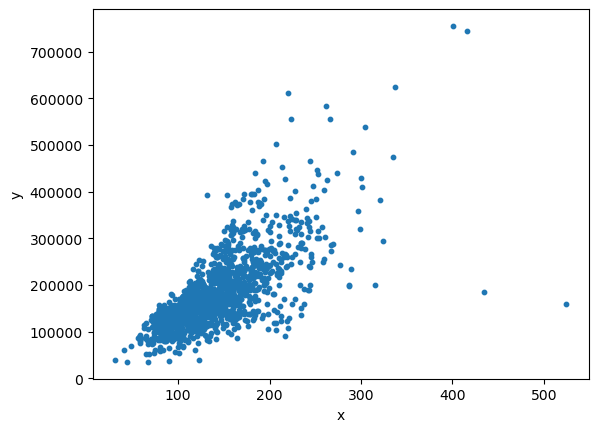

In [440]:
plt.scatter(my_df['GrLivArea_M'], my_df['SalePrice'], s=10) # df[["LotArea", "SalePrice"]
my_df = df.sort_values('GrLivArea_M')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

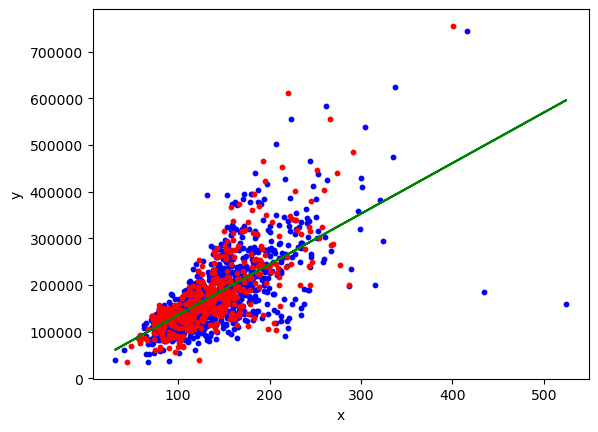

In [441]:
plt.scatter(X_train, y_train, s=10, c='b')
plt.scatter(X_test, y_test, s=10, c='r')
plt.plot(X_train, y_predict_train, c='g')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [442]:
# добавляю поочередно признаки 
my_df = df[["LotArea_M", "GrLivArea_M", "GarageArea_M", "DecadeScore", "TotalBsmtSF_M", "SalePrice"]].copy()
#df[["LotArea_M", "GrLivArea_M", "SalePrice", "GarageArea_M", "DecadeScore"]].copy()
my_df.columns

Index(['LotArea_M', 'GrLivArea_M', 'GarageArea_M', 'DecadeScore',
       'TotalBsmtSF_M', 'SalePrice'],
      dtype='object')

In [443]:
# обучаю, смотрю метрики
# Разделение данных на признаки (X) и целевую переменную (y)
X = my_df.drop('SalePrice', axis=1)
y = my_df['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 1864865179.967438
Test MSE: 1710421519.7592037


Метрики улучшаются, но по прежнему далеки от нормальных параметров. Возможно из-за разных масштабов данных, попробуем их стандартизировать и провести обучение.

In [444]:
my_df

,LotArea_M,GrLivArea_M,GarageArea_M,DecadeScore,TotalBsmtSF_M,SalePrice
0,785.030350,158.864130,50.910844,200,79.524968,208500
1,891.868800,117.243586,42.735380,197,117.243586,181500
2,1045.158750,165.924758,56.485024,200,85.470760,223500
3,887.223650,159.514451,59.643726,191,70.234668,140000
4,1324.796780,204.200794,77.666908,200,106.373935,250000
...,...,...,...,...,...,...
1455,735.513051,153.011241,42.735380,199,88.536559,175000
1456,1223.997025,192.587919,46.451500,197,143.256426,210000
1457,840.028926,217.393020,23.411556,194,107.024256,266500
1458,902.738451,100.149434,22.296720,195,100.149434,142125


Приведем данные к единому масштабу, применив стандартизацию

In [445]:

from sklearn.preprocessing import StandardScaler

# Создание экземпляра StandardScaler
scaler = StandardScaler()

# Стандартизация столбцов
columns_to_standardize = ["LotArea_M", "GrLivArea_M", "GarageArea_M", "DecadeScore", "TotalBsmtSF_M", "SalePrice"]
my_df[columns_to_standardize] = scaler.fit_transform(my_df[columns_to_standardize])


In [446]:
my_df

,LotArea_M,GrLivArea_M,GarageArea_M,DecadeScore,TotalBsmtSF_M,SalePrice
0,-0.207142,0.370333,0.351000,1.120856,-0.459303,0.347273
1,-0.091886,-0.482512,-0.060731,0.110494,0.466465,0.007288
2,0.073480,0.515013,0.631726,1.120856,-0.313369,0.536154
3,-0.096897,0.383659,0.790804,-1.910231,-0.687324,-0.515281
4,0.375148,1.299326,1.698485,1.120856,0.199680,0.869843
...,...,...,...,...,...,...
1455,-0.260560,0.250402,-0.060731,0.784069,-0.238122,-0.074560
1456,0.266407,1.061367,0.126420,0.110494,1.104925,0.366161
1457,-0.147810,1.569647,-1.033914,-0.899869,0.215641,1.077611
1458,-0.080160,-0.832788,-1.090059,-0.563081,0.046905,-0.488523


In [447]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = my_df.drop('SalePrice', axis=1)
y = my_df['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.29569172245594677
Test MSE: 0.2712032433959388


Результат значительно улучшен! Ну еще добавим OverallQual — общее качество материала и отделки, так как он так как он показывает хороший тренд.

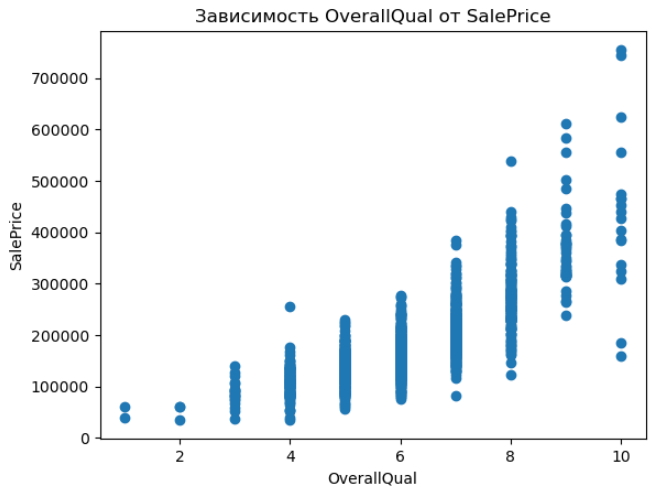

In [462]:
# добавляю поочередно признаки 
my_df = df[["LotArea_M", "GrLivArea_M", "GarageArea_M", "DecadeScore", "TotalBsmtSF_M", "OverallQual", "SalePrice"]].copy()


In [463]:

from sklearn.preprocessing import StandardScaler

# Создание экземпляра StandardScaler
scaler = StandardScaler()

# Стандартизация столбцов
columns_to_standardize = ["LotArea_M", "GrLivArea_M", "GarageArea_M", "DecadeScore", "TotalBsmtSF_M", "SalePrice", "OverallQual"]
my_df[columns_to_standardize] = scaler.fit_transform(my_df[columns_to_standardize])


In [464]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = my_df.drop('SalePrice', axis=1)
y = my_df['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.23465951574229804
Test MSE: 0.22085548399977295


YearRemodAdd — дата реконструкции также задействуем

In [465]:
my_df["YearRemodAdd"] = df["YearRemodAdd"]

In [466]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = my_df.drop('SalePrice', axis=1)
y = my_df['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.23082532406558737
Test MSE: 0.21809938218136435


In [467]:
df.columns

Index(['LotArea_M', 'Street', 'BldgType', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'ExterQual', 'ExterCond',
       'Foundation', 'TotalBsmtSF_M', 'Heating', 'HeatingQC', 'CentralAir',
       'GrLivArea_M', 'Bath', 'KitchenQual', 'GarageArea_M', 'DateSold',
       'SaleCondition', 'SalePrice', 'DecadeScore'],
      dtype='object')

In [468]:

# Вывод значений и их количества для каждого столбца
for column in df.columns:
    value_counts = df[column].value_counts()
    print(f"Столбец: {column}")
    print(value_counts)
    print()



Столбец: LotArea_M
668.901600     25
891.868800     24
557.418000     17
836.127000     14
780.385200     14
               ..
1356.476703     1
1271.098846     1
377.000374      1
1589.012912     1
902.738451      1
Name: LotArea_M, Length: 1073, dtype: int64

Столбец: Street
Pave    1454
Grvl       6
Name: Street, dtype: int64

Столбец: BldgType
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64

Столбец: OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64

Столбец: OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: OverallCond, dtype: int64

Столбец: YearBuilt
2006    67
2005    64
2004    54
2007    49
2003    45
        ..
1875     1
1911     1
1917     1
1872     1
1905     1
Name: YearBuilt, Length: 112, dtype: int64

Столбец: YearRemodAdd
1950    178
2006     97
2007     76
2005     73
20

In [469]:
# Dummy-кодирование столбца "SaleCondition"
dummy_encoded = pd.get_dummies(df['SaleCondition'], prefix='SaleCondition')

# Объединение dummy-кодированных признаков с исходным DataFrame
my_df = pd.concat([my_df, dummy_encoded], axis=1)

# Вывод результата
my_df


,LotArea_M,GrLivArea_M,GarageArea_M,DecadeScore,TotalBsmtSF_M,OverallQual,SalePrice,YearRemodAdd,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,-0.207142,0.370333,0.351000,1.120856,-0.459303,0.651479,0.347273,2003,0,0,0,0,1,0
1,-0.091886,-0.482512,-0.060731,0.110494,0.466465,-0.071836,0.007288,1976,0,0,0,0,1,0
2,0.073480,0.515013,0.631726,1.120856,-0.313369,0.651479,0.536154,2002,0,0,0,0,1,0
3,-0.096897,0.383659,0.790804,-1.910231,-0.687324,0.651479,-0.515281,1970,1,0,0,0,0,0
4,0.375148,1.299326,1.698485,1.120856,0.199680,1.374795,0.869843,2000,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,0.250402,-0.060731,0.784069,-0.238122,-0.071836,-0.074560,2000,0,0,0,0,1,0
1456,0.266407,1.061367,0.126420,0.110494,1.104925,-0.071836,0.366161,1988,0,0,0,0,1,0
1457,-0.147810,1.569647,-1.033914,-0.899869,0.215641,0.651479,1.077611,2006,0,0,0,0,1,0
1458,-0.080160,-0.832788,-1.090059,-0.563081,0.046905,-0.795151,-0.488523,1996,0,0,0,0,1,0


In [470]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = my_df.drop('SalePrice', axis=1)
y = my_df['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.22578438989254787
Test MSE: 0.2173625405702645


In [471]:
# Dummy-кодирование столбца "SaleCondition"
dummy_encoded = pd.get_dummies(df['KitchenQual'], prefix='KitchenQual')

# Объединение dummy-кодированных признаков с исходным DataFrame
my_df = pd.concat([my_df, dummy_encoded], axis=1)

# Вывод результата
my_df


,LotArea_M,GrLivArea_M,GarageArea_M,DecadeScore,TotalBsmtSF_M,OverallQual,SalePrice,YearRemodAdd,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA
0,-0.207142,0.370333,0.351000,1.120856,-0.459303,0.651479,0.347273,2003,0,0,0,0,1,0,0,0,1,0
1,-0.091886,-0.482512,-0.060731,0.110494,0.466465,-0.071836,0.007288,1976,0,0,0,0,1,0,0,0,0,1
2,0.073480,0.515013,0.631726,1.120856,-0.313369,0.651479,0.536154,2002,0,0,0,0,1,0,0,0,1,0
3,-0.096897,0.383659,0.790804,-1.910231,-0.687324,0.651479,-0.515281,1970,1,0,0,0,0,0,0,0,1,0
4,0.375148,1.299326,1.698485,1.120856,0.199680,1.374795,0.869843,2000,0,0,0,0,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,0.250402,-0.060731,0.784069,-0.238122,-0.071836,-0.074560,2000,0,0,0,0,1,0,0,0,0,1
1456,0.266407,1.061367,0.126420,0.110494,1.104925,-0.071836,0.366161,1988,0,0,0,0,1,0,0,0,0,1
1457,-0.147810,1.569647,-1.033914,-0.899869,0.215641,0.651479,1.077611,2006,0,0,0,0,1,0,0,0,1,0
1458,-0.080160,-0.832788,-1.090059,-0.563081,0.046905,-0.795151,-0.488523,1996,0,0,0,0,1,0,0,0,1,0


In [472]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = my_df.drop('SalePrice', axis=1)
y = my_df['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.20861270046269256
Test MSE: 0.1912484768906335


In [474]:
# Dummy-кодирование столбца "SaleCondition"
dummy_encoded = pd.get_dummies(df['Bath'], prefix='Bath')

# Объединение dummy-кодированных признаков с исходным DataFrame
my_df = pd.concat([my_df, dummy_encoded], axis=1)

# Вывод результата
my_df


,LotArea_M,GrLivArea_M,GarageArea_M,DecadeScore,TotalBsmtSF_M,OverallQual,SalePrice,YearRemodAdd,SaleCondition_Abnorml,SaleCondition_AdjLand,...,SaleCondition_Partial,KitchenQual_Ex,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,Bath_0,Bath_1,Bath_2,Bath_3,Bath_4
0,-0.207142,0.370333,0.351000,1.120856,-0.459303,0.651479,0.347273,2003,0,0,...,0,0,0,1,0,0,0,0,1,0
1,-0.091886,-0.482512,-0.060731,0.110494,0.466465,-0.071836,0.007288,1976,0,0,...,0,0,0,0,1,0,0,1,0,0
2,0.073480,0.515013,0.631726,1.120856,-0.313369,0.651479,0.536154,2002,0,0,...,0,0,0,1,0,0,0,0,1,0
3,-0.096897,0.383659,0.790804,-1.910231,-0.687324,0.651479,-0.515281,1970,1,0,...,0,0,0,1,0,0,1,0,0,0
4,0.375148,1.299326,1.698485,1.120856,0.199680,1.374795,0.869843,2000,0,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,0.250402,-0.060731,0.784069,-0.238122,-0.071836,-0.074560,2000,0,0,...,0,0,0,0,1,0,0,0,1,0
1456,0.266407,1.061367,0.126420,0.110494,1.104925,-0.071836,0.366161,1988,0,0,...,0,0,0,0,1,0,0,1,0,0
1457,-0.147810,1.569647,-1.033914,-0.899869,0.215641,0.651479,1.077611,2006,0,0,...,0,0,0,1,0,0,0,1,0,0
1458,-0.080160,-0.832788,-1.090059,-0.563081,0.046905,-0.795151,-0.488523,1996,0,0,...,0,0,0,1,0,0,1,0,0,0


In [475]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = my_df.drop('SalePrice', axis=1)
y = my_df['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.20367924132242404
Test MSE: 0.17848594366211126


In [479]:
# Dummy-кодирование столбца "SaleCondition"
dummy_encoded = pd.get_dummies(df['Foundation'], prefix='Foundation')

# Объединение dummy-кодированных признаков с исходным DataFrame
my_df = pd.concat([my_df, dummy_encoded], axis=1)

# Вывод результата
my_df


,LotArea_M,GrLivArea_M,GarageArea_M,DecadeScore,TotalBsmtSF_M,OverallQual,SalePrice,YearRemodAdd,SaleCondition_Abnorml,SaleCondition_AdjLand,...,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood
0,-0.207142,0.370333,0.351000,1.120856,-0.459303,0.651479,0.347273,2003,0,0,...,0,0,0,0,0,0,1,0,0,0
1,-0.091886,-0.482512,-0.060731,0.110494,0.466465,-0.071836,0.007288,1976,0,0,...,0,0,0,0,0,1,0,0,0,0
2,0.073480,0.515013,0.631726,1.120856,-0.313369,0.651479,0.536154,2002,0,0,...,0,0,0,0,0,0,1,0,0,0
3,-0.096897,0.383659,0.790804,-1.910231,-0.687324,0.651479,-0.515281,1970,1,0,...,0,1,0,0,1,0,0,0,0,0
4,0.375148,1.299326,1.698485,1.120856,0.199680,1.374795,0.869843,2000,0,0,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,-0.260560,0.250402,-0.060731,0.784069,-0.238122,-0.071836,-0.074560,2000,0,0,...,0,0,0,0,0,0,1,0,0,0
1456,0.266407,1.061367,0.126420,0.110494,1.104925,-0.071836,0.366161,1988,0,0,...,0,0,0,1,0,1,0,0,0,0
1457,-0.147810,1.569647,-1.033914,-0.899869,0.215641,0.651479,1.077611,2006,0,0,...,0,0,0,0,0,0,0,0,1,0
1458,-0.080160,-0.832788,-1.090059,-0.563081,0.046905,-0.795151,-0.488523,1996,0,0,...,0,1,0,0,0,1,0,0,0,0


In [480]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = my_df.drop('SalePrice', axis=1)
y = my_df['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.20189254615715793
Test MSE: 0.1783669821950928


## Задание 4 

Подготовьте данные:

1. Разделите данные на тренировочную и тестовую выборки.

In [ ]:
### Ваш код здесь ### 
# сделано выше

2. Закодируйте категориальные признаки в тренировочной и тестовой выборках.

In [ ]:
### Ваш код здесь ###
# сделано выше

3. Подготовьте числовые признаки в тренировочной и тестовой выборках к передаче в модель: приведите их к единому масштабу.

In [ ]:
### Ваш код здесь ###
сделано выше

## Задание 5

Займитесь обучением модели:

1. Обучите модель линейной регрессии без регуляризации. Посмотрите на веса полученной модели. Сделайте предсказания по обучающей и тестовой выборкам.

In [544]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Разделение данных на признаки (X) и целевую переменную (y)
X = my_df.drop('SalePrice', axis=1)
y = my_df['SalePrice']


# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Создание и обучение модели
model = LinearRegression()
model.fit(X_train, y_train)

# Вывод весов модели
print("Weights of the model:")
for feature, weight in zip(X.columns, model.coef_):
    print(f"{feature}: {weight}")

# Предсказание на тренировочной и тестовой выборках
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)

# Вычисление среднеквадратичной ошибки
train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)

# Вывод среднеквадратичной ошибки
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))


Weights of the model:
LotArea_M: 0.08543896089633082
GrLivArea_M: 0.2564470536248522
GarageArea_M: 0.1172960652459972
DecadeScore: 0.06911387250643815
TotalBsmtSF_M: 0.08252546040765044
OverallQual: 0.3085816941075681
YearRemodAdd: 0.0019532146839836475
SaleCondition_Abnorml: -0.17109015674108957
SaleCondition_AdjLand: -0.0103704783301434
SaleCondition_Alloca: 0.46081776378808753
SaleCondition_Family: -0.25491897887246523
SaleCondition_Normal: -0.06767845211103754
SaleCondition_Partial: 0.04324030226664622
KitchenQual_Ex: 0.4592293005217757
KitchenQual_Fa: -0.14552695348913017
KitchenQual_Gd: -0.10275164978126851
KitchenQual_TA: -0.21095069725137727
Bath_0: -1.1102230246251565e-16
Bath_1: -0.10731271887120294
Bath_2: -0.1609425117095416
Bath_3: -0.1334652066210213
Bath_4: 0.40172043720176576
HeatingQC_Ex: 0.0910590500586424
HeatingQC_Fa: 0.04770521404536391
HeatingQC_Gd: 0.018975410681035292
HeatingQC_Po: -0.16295554072972213
HeatingQC_TA: 0.0052158659446817045
Foundation_BrkTil: -0.05

2. Понаблюдайте, как ведёт себя модель с L1-регуляризацией (Lasso). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Lasso.

In [545]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=0.1, random_state=42) # alpha — величина регуляризации

# обучение
lasso_regression.fit(X_train, y_train)

Lasso(alpha=0.1, random_state=42)

In [546]:
# вывод точности предсказания
print(lasso_regression.score(X_train, y_train))
print(lasso_regression.score(X_test, y_test))

0.7286154375099487
0.754606330960523


In [547]:
# поищем лучшее значение alpha_values
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

# Задайте список значений alpha, которые вы хотите проверить
alpha_values = [0.001, 0.03, 0.1, 1.0, 10.0]

# Создайте объект модели Lasso
lasso_model = Lasso()

# Создайте объект GridSearchCV для подбора параметра alpha
grid_search = GridSearchCV(lasso_model, {'alpha': alpha_values}, cv=5)

# Обучите модель с использованием GridSearchCV
grid_search.fit(X_train, y_train)

# Выведите наилучшее значение alpha
print("Best alpha:", grid_search.best_params_['alpha'])


Best alpha: 0.001


Функция np.logspace() из библиотеки NumPy используется для генерации чисел в логарифмической шкале. Она принимает три аргумента: start, stop и num.
start: это начальное значение логарифма, которое будет использоваться для генерации чисел. В нашем случае, start равен -3, что означает, что мы начинаем с логарифма значения 10 в степени -3, то есть 0.001.
stop: это конечное значение логарифма, которое будет использоваться для генерации чисел. В нашем случае, stop равен 3, что означает, что мы заканчиваем на логарифме значения 10 в степени 3, то есть 1000.
num: это количество чисел, которые будут сгенерированы в логарифмической шкале между start и stop. В нашем случае, num равен 100, поэтому будет сгенерировано 100 чисел.
Таким образом, np.logspace(-3, 3, num=7) создает список из 100 чисел, равномерно распределенных в логарифмической шкале от 0.001 до 1000. Это позволяет нам проверить значения alpha в широком диапазоне, начиная от очень маленьких (0.001) до очень больших (1000).

In [548]:
# доработаем код 
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Задайте список значений alpha, которые вы хотите проверить
alpha_values = np.logspace(-3, 3, num=500)

# Создайте объект модели Lasso
lasso_model = Lasso()

# Создайте объект GridSearchCV для подбора параметра alpha
grid_search = GridSearchCV(lasso_model, {'alpha': alpha_values}, cv=5)

# Обучите модель с использованием GridSearchCV
grid_search.fit(X_train, y_train)

# Выведите наилучшее значение alpha
print("Best alpha:", grid_search.best_params_['alpha'])


Best alpha: 0.003992109129748053


In [632]:
from sklearn.linear_model import Lasso

lasso_regression = Lasso(alpha=0.003992109129748053, random_state=42) # alpha — величина регуляризации

# обучение
lasso_regression.fit(X_train, y_train)

# вывод точности предсказания
print(lasso_regression.score(X_train, y_train))
print(lasso_regression.score(X_test, y_test))

0.7838869880421586
0.836729900130355


In [633]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


y_true = y_train  # истинные значения
y_pred = y_predict_train  # предсказанные значения

mae = mean_absolute_error(y_true, y_pred).round(4)
mae_1 = mean_absolute_error(y_test, y_predict_test).round(4)

train_mse = mean_squared_error(y_train, y_predict_train).round(4)
test_mse = mean_squared_error(y_test, y_predict_test).round(4)

r2 = r2_score(y_train, y_predict_train).round(4)
r2_1 = r2_score(y_test, y_predict_test).round(4)

print("Выведем метрики")
print("--------------------------------")
print("MAE train:", mae)
print("MAE test:", mae_1)
print("--------------------------------")
print("MSE train:", train_mse)
print("MSE test:", test_mse)
print("--------------------------------")
print("R2 train:", r2)
print("R2 test:", r2_1)

Выведем метрики
--------------------------------
MAE train: 0.2682
MAE test: 0.2756
--------------------------------
MSE train: 0.2019
MSE test: 0.1784
--------------------------------
R2 train: 0.7884
R2 test: 0.8388


Посмотрите на веса полученной модели. Какой вывод можно сделать?

In [550]:
# Вывод весов модели
print("Weights of the model:")
for feature, weight in zip(X.columns, model.coef_):
    print(f"{feature}: {weight}")

Weights of the model:
LotArea_M: 0.08543896089633082
GrLivArea_M: 0.2564470536248522
GarageArea_M: 0.1172960652459972
DecadeScore: 0.06911387250643815
TotalBsmtSF_M: 0.08252546040765044
OverallQual: 0.3085816941075681
YearRemodAdd: 0.0019532146839836475
SaleCondition_Abnorml: -0.17109015674108957
SaleCondition_AdjLand: -0.0103704783301434
SaleCondition_Alloca: 0.46081776378808753
SaleCondition_Family: -0.25491897887246523
SaleCondition_Normal: -0.06767845211103754
SaleCondition_Partial: 0.04324030226664622
KitchenQual_Ex: 0.4592293005217757
KitchenQual_Fa: -0.14552695348913017
KitchenQual_Gd: -0.10275164978126851
KitchenQual_TA: -0.21095069725137727
Bath_0: -1.1102230246251565e-16
Bath_1: -0.10731271887120294
Bath_2: -0.1609425117095416
Bath_3: -0.1334652066210213
Bath_4: 0.40172043720176576
HeatingQC_Ex: 0.0910590500586424
HeatingQC_Fa: 0.04770521404536391
HeatingQC_Gd: 0.018975410681035292
HeatingQC_Po: -0.16295554072972213
HeatingQC_TA: 0.0052158659446817045
Foundation_BrkTil: -0.05

In [551]:
# Получите веса модели
weights = model.coef_

# Отсортируйте веса в порядке убывания
sorted_weights = sorted(weights, reverse=True)

# Выведите веса в порядке убывания
print("Weights in descending order:")
for weight in sorted_weights:
    print(weight)

Weights in descending order:
0.46081776378808753
0.4592293005217757
0.40172043720176576
0.3085816941075681
0.2564470536248522
0.1172960652459972
0.0910590500586424
0.08543896089633082
0.08252546040765044
0.07044021087585037
0.06911387250643815
0.06745174168127459
0.06461579060247011
0.04770521404536391
0.04324030226664622
0.0247843362899337
0.018975410681035292
0.0052158659446817045
0.0019532146839836475
-1.1102230246251565e-16
-0.0103704783301434
-0.055761296761630115
-0.06767845211103754
-0.10275164978126851
-0.10731271887120294
-0.1334652066210213
-0.14552695348913017
-0.1609425117095416
-0.16295554072972213
-0.17109015674108957
-0.17153078268789884
-0.21095069725137727
-0.25491897887246523


In [552]:
# Получите веса модели
weights = model.coef_

# Создайте список пар (название признака, вес)
feature_weights = list(zip(X.columns, weights))

# Отсортируйте список пар по весам в порядке убывания
sorted_feature_weights = sorted(feature_weights, key=lambda x: x[1], reverse=True)

# Выведите названия признаков и их веса в порядке убывания
print("Feature weights in descending order:")
for feature, weight in sorted_feature_weights:
    print(f"{feature}: {weight}")

Feature weights in descending order:
SaleCondition_Alloca: 0.46081776378808753
KitchenQual_Ex: 0.4592293005217757
Bath_4: 0.40172043720176576
OverallQual: 0.3085816941075681
GrLivArea_M: 0.2564470536248522
GarageArea_M: 0.1172960652459972
HeatingQC_Ex: 0.0910590500586424
LotArea_M: 0.08543896089633082
TotalBsmtSF_M: 0.08252546040765044
Foundation_PConc: 0.07044021087585037
DecadeScore: 0.06911387250643815
Foundation_Slab: 0.06745174168127459
Foundation_CBlock: 0.06461579060247011
HeatingQC_Fa: 0.04770521404536391
SaleCondition_Partial: 0.04324030226664622
Foundation_Stone: 0.0247843362899337
HeatingQC_Gd: 0.018975410681035292
HeatingQC_TA: 0.0052158659446817045
YearRemodAdd: 0.0019532146839836475
Bath_0: -1.1102230246251565e-16
SaleCondition_AdjLand: -0.0103704783301434
Foundation_BrkTil: -0.055761296761630115
SaleCondition_Normal: -0.06767845211103754
KitchenQual_Gd: -0.10275164978126851
Bath_1: -0.10731271887120294
Bath_3: -0.1334652066210213
KitchenQual_Fa: -0.14552695348913017
Bath

In [553]:

# Создайте список пар (название признака, вес)
feature_weights = list(zip(X.columns, weights))

# Отсортируйте список пар по весам в порядке убывания
sorted_feature_weights = sorted(feature_weights, key=lambda x: x[1], reverse=True)

# Создайте отдельный датафрейм с названиями признаков и их весами
weights_df = pd.DataFrame(sorted_feature_weights, columns=['Feature', 'Weight'])

# Округлите веса до 5 цифр после запятой
weights_df['Weight'] = weights_df['Weight'].round(5)

# Выведите датафрейм с названиями признаков и их весами
print(weights_df)


                  Feature   Weight
0    SaleCondition_Alloca  0.46082
1          KitchenQual_Ex  0.45923
2                  Bath_4  0.40172
3             OverallQual  0.30858
4             GrLivArea_M  0.25645
5            GarageArea_M  0.11730
6            HeatingQC_Ex  0.09106
7               LotArea_M  0.08544
8           TotalBsmtSF_M  0.08253
9        Foundation_PConc  0.07044
10            DecadeScore  0.06911
11        Foundation_Slab  0.06745
12      Foundation_CBlock  0.06462
13           HeatingQC_Fa  0.04771
14  SaleCondition_Partial  0.04324
15       Foundation_Stone  0.02478
16           HeatingQC_Gd  0.01898
17           HeatingQC_TA  0.00522
18           YearRemodAdd  0.00195
19                 Bath_0 -0.00000
20  SaleCondition_AdjLand -0.01037
21      Foundation_BrkTil -0.05576
22   SaleCondition_Normal -0.06768
23         KitchenQual_Gd -0.10275
24                 Bath_1 -0.10731
25                 Bath_3 -0.13347
26         KitchenQual_Fa -0.14553
27                 B

In [554]:
# Разделение данных на признаки (X) и целевую переменную (y)
X = my_df.drop('SalePrice', axis=1)
y = my_df['SalePrice']

# Разделение данных на тренировочную и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_predict_train = model.predict(X_train)
y_predict_test = model.predict(X_test)
from sklearn.metrics import mean_squared_error

train_mse = mean_squared_error(y_train, y_predict_train)
test_mse = mean_squared_error(y_test, y_predict_test)
print("Train MSE: {}".format(train_mse))
print("Test MSE: {}".format(test_mse))

Train MSE: 0.20189254615715793
Test MSE: 0.1783669821950928


3. Понаблюдайте, как ведёт себя модель с L2-регуляризацией (Ridge). Найдите лучший параметр регуляризации. Сделайте предсказания по обучающей и тестовой выборкам, замерьте качество с помощью MAE, MSE, $R^2$. Для воспроизводимости результатов задайте параметр `random_state=42` при определении модели Ridge.

In [556]:
from sklearn.linear_model import Ridge

ridge_regression = Ridge(alpha=0.1, random_state=42)  # alpha — величина регуляризации

# обучение
ridge_regression.fit(X_train, y_train)

Ridge(alpha=0.1, random_state=42)

In [557]:
# вывод точности предсказания
print(ridge_regression.score(X_train, y_train))
print(ridge_regression.score(X_test, y_test))

0.7884383471604398
0.8389517038421992


In [558]:
# коэффициенты модели
print('w_0:', ridge_regression.intercept_)
print('w_i:', ridge_regression.coef_)

w_0: -3.693185351433551
w_i: [ 0.08543561  0.25688259  0.11725359  0.06928098  0.08241646  0.30861567
  0.00196118 -0.1694514  -0.00887884  0.4521457  -0.25214472 -0.06638409
  0.04471335  0.45821719 -0.14468995 -0.10279567 -0.21073157  0.
 -0.10617912 -0.16003557 -0.13291679  0.39913147  0.08792464  0.04436759
  0.01587483 -0.15045299  0.00228593 -0.05645856  0.0638035   0.06960313
  0.06726369  0.02311926 -0.16733102]


In [598]:
coef = []
for i in range(-7, 2):
  alpha = 10**i
  ridge_regression = Ridge(alpha=alpha)  # alpha — величина регуляризации

  # обучение
  ridge_regression.fit(X_train, y_train)

  coef.extend(list(ridge_regression.coef_))

  # вывод точности предсказания
  print('-'*5, 'lambda =', alpha, '-'*5)
  print(ridge_regression.score(X_train, y_train))
  print(ridge_regression.score(X_test, y_test))

----- lambda = 1e-07 -----
0.7884393720142351
0.8387922424183966
----- lambda = 1e-06 -----
0.788439372014235
0.8387922440726032
----- lambda = 1e-05 -----
0.7884393720142242
0.8387922589230014
----- lambda = 0.0001 -----
0.7884393720131426
0.8387924073723629
----- lambda = 0.001 -----
0.7884393719050614
0.838793891343767
----- lambda = 0.01 -----
0.7884393611624293
0.8388086809911779
----- lambda = 0.1 -----
0.7884383471604398
0.8389517038421992
----- lambda = 1 -----
0.7883706417290126
0.8399972171345973
----- lambda = 10 -----
0.7868013837066133
0.8401540417521797


In [570]:
# доработаем код 
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np

# Задайте список значений alpha, которые вы хотите проверить
alpha_values = np.logspace(-3, 3, num=100)

# Создайте объект модели Lasso
ridge_model = Ridge() #lasso_model = Lasso()

# Создайте объект GridSearchCV для подбора параметра alpha
grid_search = GridSearchCV(ridge_model, {'alpha': alpha_values}, cv=5)

# Обучите модель с использованием GridSearchCV
grid_search.fit(X_train, y_train)

# Выведите наилучшее значение alpha
print("Best alpha:", grid_search.best_params_['alpha'])


Best alpha: 81.11308307896873


In [592]:
from sklearn.linear_model import Ridge

ridge_regression = Ridge(alpha=9, random_state=42)  # alpha — величина регуляризации

# обучение
ridge_regression.fit(X_train, y_train)

# вывод точности предсказания
print(ridge_regression.score(X_train, y_train))
print(ridge_regression.score(X_test, y_test))

0.7869788609358642
0.8403834640162592


In [631]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score


y_true = y_train  # истинные значения
y_pred = y_predict_train  # предсказанные значения

mae = mean_absolute_error(y_true, y_pred).round(4)
mae_1 = mean_absolute_error(y_test, y_predict_test).round(4)

train_mse = mean_squared_error(y_train, y_predict_train).round(4)
test_mse = mean_squared_error(y_test, y_predict_test).round(4)

r2 = r2_score(y_train, y_predict_train).round(4)
r2_1 = r2_score(y_test, y_predict_test).round(4)

print("Выведем метрики")
print("--------------------------------")
print("MAE train:", mae)
print("MAE test:", mae_1)
print("--------------------------------")
print("MSE train:", train_mse)
print("MSE test:", test_mse)
print("--------------------------------")
print("R2 train:", r2)
print("R2 test:", r2_1)

Выведем метрики
--------------------------------
MAE train: 0.2682
MAE test: 0.2756
--------------------------------
MSE train: 0.2019
MSE test: 0.1784
--------------------------------
R2 train: 0.7884
R2 test: 0.8388


Посмотрите на веса полученной модели. Какой вывод можно сделать?

Модель с L2-регуляризацией (Ridge) оптимизировала веса и приблизила к нулю те, которые не нужны для предсказаний, а также некоторым из весов придала отрицательные значения для того чтобы при вычислении предсказания они уменьшили его значение (в целях его приближения к наиболее близкому решению) 

In [610]:
for i in range(len(ridge_regression.coef_)):
    print(i+1, X_train.columns[i], ridge_regression.coef_[i])

1 LotArea_M 0.08517705407790034
2 GrLivArea_M 0.2752670482857183
3 GarageArea_M 0.11763419084990942
4 DecadeScore 0.07819663173175193
5 TotalBsmtSF_M 0.07936090850845985
6 OverallQual 0.31145375356800414
7 YearRemodAdd 0.0024069633461118313
8 SaleCondition_Abnorml -0.1051684016936479
9 SaleCondition_AdjLand 0.009794875877693265
10 SaleCondition_Alloca 0.15873710871809063
11 SaleCondition_Family -0.1329151461104468
12 SaleCondition_Normal -0.022234383097507564
13 SaleCondition_Partial 0.0917859463058199
14 KitchenQual_Ex 0.38261018875064806
15 KitchenQual_Fa -0.08697641719977006
16 KitchenQual_Gd -0.10466540561378024
17 KitchenQual_TA -0.19096836593709543
18 Bath_0 0.0
19 Bath_1 -0.04543687161075018
20 Bath_2 -0.11034114929368587
21 Bath_3 -0.0970672880218471
22 Bath_4 0.25284530892628476
23 HeatingQC_Ex 0.05468715889761316
24 HeatingQC_Fa 0.0050491057686168316
25 HeatingQC_Gd -0.01694192673948888
26 HeatingQC_Po -0.015808855563424668
27 HeatingQC_TA -0.026985482363309037
28 Foundation_

In [616]:
# Получите веса модели
weights_1 = ridge_regression.coef_

# Создайте список пар (название признака, вес)
feature_weights_1 = list(zip(X.columns, weights_1))

# Отсортируйте список пар по весам в порядке убывания
sorted_feature_weights_1 = sorted(feature_weights_1, key=lambda x: x[1], reverse=True)



    # Создайте отдельный датафрейм с названиями признаков и их весами
weights_df_1 = pd.DataFrame(sorted_feature_weights_1, columns=['Feature', 'Weight'])

# Округлите веса до 5 цифр после запятой
weights_df_1['Weight'] = weights_df_1['Weight'].round(5)

# Выведите датафрейм с названиями признаков и их весами
print(weights_df_1)



                  Feature   Weight
0          KitchenQual_Ex  0.38261
1             OverallQual  0.31145
2             GrLivArea_M  0.27527
3                  Bath_4  0.25285
4    SaleCondition_Alloca  0.15874
5            GarageArea_M  0.11763
6   SaleCondition_Partial  0.09179
7               LotArea_M  0.08518
8           TotalBsmtSF_M  0.07936
9             DecadeScore  0.07820
10           HeatingQC_Ex  0.05469
11        Foundation_Slab  0.04930
12       Foundation_PConc  0.04303
13      Foundation_CBlock  0.03785
14  SaleCondition_AdjLand  0.00979
15           HeatingQC_Fa  0.00505
16           YearRemodAdd  0.00241
17                 Bath_0  0.00000
18       Foundation_Stone -0.00551
19           HeatingQC_Po -0.01581
20           HeatingQC_Gd -0.01694
21   SaleCondition_Normal -0.02223
22           HeatingQC_TA -0.02699
23                 Bath_1 -0.04544
24        Foundation_Wood -0.05392
25      Foundation_BrkTil -0.07076
26         KitchenQual_Fa -0.08698
27                 B

## Задание 6

Ответьте на следующие вопросы:

1. В последней обученной модели выберите три признака с наибольшими положительными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем больше сумма сделки?

2. В последней обученной модели выберите три признака с наибольшими отрицательными коэффициентами. Можно ли утверждать, что чем больше значения этих признаков, тем меньше сумма сделки?

3. В модели Lasso выберите три признака с нулевыми коэффициентами. Как вы думаете, почему модель их исключила? Можно ли смело утверждать, что сумма сделки от этих признаков не зависит?

## Заключение

В этом модуле с помощью регуляризации вы научились обучать модели линейной регрессии с регуляризацией, подбирать коэффициент регуляризации alpha, а также отбирать признаки с помощью L1-регуляризации. 